In [254]:
#!unzip data.csv.zip

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from IPython.display import Markdown, display
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [256]:
df = pd.read_csv('mfs.csv')

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\1564754870.py:1: DtypeWarning: Columns (167,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mfs.csv')


In [257]:
df

fund_symbol                                 fund_extended_name  \
0           AAAAX               DWS RREEF Real Assets Fund - Class A   
1           AAADX               Aberdeen Income Builder Fund Class A   
2           AAAGX             Thrivent Large Cap Growth Fund Class A   
3           AAAIX  American Century Strategic Allocation: Aggress...   
4           AAANX  Horizon Active Asset Allocation Fund Investor ...   
...           ...                                                ...   
24816       ZSCIX      Zacks Small-Cap Core Fund Institutional Class   
24817       ZVGIX         Zevenbergen Genea Fund Institutional Class   
24818       ZVGNX              Zevenbergen Genea Fund Investor Class   
24819       ZVNBX             Zevenbergen Growth Fund Investor Class   
24820       ZVNIX        Zevenbergen Growth Fund Institutional Class   

                           fund_family inception_date  \
0                                  DWS     2007-07-29   
1                             Aberdeen     2011-12-29   
2                       Thrivent Funds     1999-10-28   
3         American Century Investments     2000-07-31   
4                  Horizon Investments     2012-01-30   
...                                ...            ...   
24816                      Zacks Funds     2014-02-27   
24817  Zevenbergen Capital Investments     2015-08-30   
24818  Zevenbergen Capital Investments     2015-08-30   
24819  Zevenbergen Capital Investments     2015-08-30   
24820  Zevenbergen Capital Investments     2015-08-30   

                             category  rating  return_rating  risk_rating  \
0                    World Allocation     3.0            3.0          3.0   
1      Allocation - 50% to 70% Equity     4.0            5.0          5.0   
2                        Large Growth     3.0            3.0          4.0   
3      Allocation - 70% to 85% Equity     4.0            4.0          3.0   
4                 Tactical Allocation     3.0            4.0          5.0   
...                               ...     ...            ...          ...   
24816                     Small Blend     2.0            2.0          3.0   
24817                    Large Growth     5.0            5.0          5.0   
24818                    Large Growth     5.0            5.0          5.0   
24819                    Large Growth     5.0            5.0          5.0   
24820                    Large Growth     5.0            5.0          5.0   

                                     investment_strategy investment_type  ...  \
0      The investment seeks total return in excess of...           Blend  ...   
1      The investment seeks income; long-term growth ...           Blend  ...   
2      The investment seeks long-term capital appreci...          Growth  ...   
3      The investment seeks the highest level of tota...           Blend  ...   
4      The investment seeks capital appreciation. The...           Blend  ...   
...                                                  ...             ...  ...   
24816  The investment seeks capital appreciation. The...          Growth  ...   
24817  The investment seeks long-term capital appreci...          Growth  ...   
24818  The investment seeks long-term capital appreci...          Growth  ...   
24819  The investment seeks long-term capital appreci...          Growth  ...   
24820  The investment seeks long-term capital appreci...          Growth  ...   

      fund_sharpe_ratio_5years category_sharpe_ratio_5years  \
0                         0.33                         0.00   
1                         0.74                         0.01   
2                         0.88                         0.01   
3                         0.61                         0.00   
4                         0.37                         0.00   
...                        ...                          ...   
24816                     0.20                         0.00   
24817                     1.16                        

In [258]:
df.columns.to_list()

['fund_symbol',
 'fund_extended_name',
 'fund_family',
 'inception_date',
 'category',
 'rating',
 'return_rating',
 'risk_rating',
 'investment_strategy',
 'investment_type',
 'size_type',
 'currency',
 'fund_net_annual_expense_ratio',
 'category_net_annual_expense_ratio',
 'asset_cash',
 'asset_stocks',
 'asset_bonds',
 'asset_others',
 'asset_preferred',
 'asset_convertable',
 'price_earnings_ratio',
 'price_book_ratio',
 'price_sales_ratio',
 'price_cashflow_ratio',
 'median_market_cap',
 'sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology',
 'bond_maturity',
 'bond_duration',
 'credit_us_government',
 'credit_aaa',
 'credit_aa',
 'credit_a',
 'credit_bbb',
 'credit_bb',
 'credit_b',
 'credit_below_b',
 'credit_other_ratings',
 'net_asset_value',
 'fund_yield',


In [259]:
# Create a different dataset for each group so as to get better understanding of the data

In [260]:
# B1 -> 

bucket_1_list = ['fund_symbol','fund_extended_name', 'fund_family','inception_date', 'category', 'currency']

# Simple bucket gives information about the Fund name and category and currency

common_list = ['rating','return_rating',
 'risk_rating',
 'investment_strategy',
 'investment_type',
 'size_type']

# Bucket-2

rating_list = ['rating',
 'median_market_cap',
 'return_rating',
 'risk_rating',
 'investment_strategy',
 'investment_type',
 'size_type',
 'fund_yield',
 'top10_holdings',
 'fund_return_ytd',
 'category_return_ytd',
 'fund_net_annual_expense_ratio',
 'net_asset_value',
 'category_net_annual_expense_ratio']
 

# Gives information about the rating returns and size of the stocks. One of the most important buckets. Can get multiple charts out of this


# Bucket-3

asset_bucket = ['asset_cash',
 'asset_stocks',
 'asset_bonds',
 'asset_others',
 'asset_preferred',
 'asset_convertable']

# Asset details. Will have to check how this can be used.

# Bucket-4

# Price ratio details
 
price_ratio_bucket = ['price_earnings_ratio',
 'price_book_ratio',
 'price_sales_ratio',
 'price_cashflow_ratio']

# Bucket-5 
# Gives sector details

sector_bucket = ['sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology'
]

# Bucket-6

# Credit values. Not much important

credit_bucket =  ['bond_maturity',
 'bond_duration',
 'credit_us_government',
 'credit_aaa',
 'credit_aa',
 'credit_a',
 'credit_bbb',
 'credit_bb',
 'credit_b',
 'credit_below_b',
 'credit_other_ratings']
 


# Bucket-7 Fund and category return over the years -> Create a function, input 1 or 2

# Extract this bucket and stock mentioned and plot the charts for year wise analysis.

fund_return_bucket =  ['fund_return_1month',
 'category_return_1month',
 'fund_return_3months',
 'category_return_3months',
 'fund_return_1year',
 'category_return_1year',
 'fund_return_3years',
 'category_return_3years',
 'fund_return_5years',
 'category_return_5years',
 'fund_return_10years',
 'category_return_10years',
 'fund_return_2019',
 'category_return_2019',
 'fund_return_2018',
 'category_return_2018',
 'fund_return_2017',
 'category_return_2017',
 'fund_return_2016',
 'category_return_2016',
 'fund_return_2015',
 'category_return_2015',
 'fund_return_2014',
 'category_return_2014',
 'fund_return_2013',
 'category_return_2013',
 'fund_return_2012',
 'category_return_2012',
 'fund_return_2011',
 'category_return_2011',
 'fund_return_2010',
 'category_return_2010']



# Sum them not much important
#  'years_up',
#  'years_down',

# Same as the above bucket but for quarters.
quarter_bucket = ['fund_return_2020_q3',
 'fund_return_2020_q2',
 'fund_return_2020_q1',
 'fund_return_2019_q4',
 'fund_return_2019_q3',
 'fund_return_2019_q2',
 'fund_return_2019_q1',
 'fund_return_2018_q4',
 'fund_return_2018_q3',
 'fund_return_2018_q2',
 'fund_return_2018_q1',
 'fund_return_2017_q4',
 'fund_return_2017_q3',
 'fund_return_2017_q2',
 'fund_return_2017_q1',
 'fund_return_2016_q4',
 'fund_return_2016_q3',
 'fund_return_2016_q2',
 'fund_return_2016_q1',
 'fund_return_2015_q4',
 'fund_return_2015_q3',
 'fund_return_2015_q2',
 'fund_return_2015_q1',
 'fund_return_2014_q4',
 'fund_return_2014_q3',
 'fund_return_2014_q2',
 'fund_return_2014_q1',
 'fund_return_2013_q4',
 'fund_return_2013_q3',
 'fund_return_2013_q2',
 'fund_return_2013_q1',
 'fund_return_2012_q4',
 'fund_return_2012_q3',
 'fund_return_2012_q2',
 'fund_return_2012_q1',
 'fund_return_2011_q4',
 'fund_return_2011_q3',
 'fund_return_2011_q2',
 'fund_return_2011_q1',
 'fund_return_2010_q4',
 'fund_return_2010_q3',
 'fund_return_2010_q2',
 'fund_return_2010_q1'],

#  'quarters_up',
#  'Quarters_down',

# Alpha and beta bucket
alpha_beta_bucket=['fund_alpha_3years',
 'category_alpha_3years',
 'fund_alpha_5years',
 'category_alpha_5years',
 'fund_alpha_10years',
 'category_alpha_10years',
 'fund_beta_3years',
 'category_beta_3years',
 'fund_beta_5years',
 'category_beta_5years',
 'fund_beta_10years',
 'category_beta_10years']

# Mean and annual return bucket
return_mean_bucket = ['fund_mean_annual_return_3years',
 'category_mean_annual_return_3years',
 'fund_mean_annual_return_5years',
 'category_mean_annual_return_5years',
 'fund_mean_annual_return_10years',
 'Category_mean_annual_return_10years']

# R-squared bucket
r_squared_bucket =['fund_r_squared_3years',
 'category_r_squared_3years',
 'fund_r_squared_5years',
 'category_r_squared_5years',
 'fund_r_squared_10years',
 'Category_r_squared_10years']
# Deviation bucket
 
deviation_bucket =[ 'fund_standard_deviation_3years',
 'category_standard_deviation_3years',
 'fund_standard_deviation_5years',
 'category_standard_deviation_5years',
 'fund_standard_deviation_10years',
 'category_standard_deviation_10years']
 
# Sharpe Ratio bucket

sph_ratio_bucket =['fund_sharpe_ratio_3years',
 'category_sharpe_ratio_3years',
 'fund_sharpe_ratio_5years',
 'category_sharpe_ratio_5years',
 'fund_sharpe_ratio_10years',
 'Category_sharpe_ratio_10years']

# Treynor Ratio bucket

treynor_bucket = ['fund_treynor_ratio_3years',
 'category_treynor_ratio_3years',
 'fund_treynor_ratio_5years',
 'category_treynor_ratio_5years',
 'fund_treynor_ratio_10years',
 'category_treynor_ratio_10years']



In [261]:

df_mf_info = df[bucket_1_list]

df_return = df[rating_list] 

df_asset = df[asset_bucket+common_list] 

df_price_ratio = df[price_ratio_bucket+common_list]
df_sector = df[sector_bucket+common_list] 
df_credit = df[credit_bucket+common_list] 

df_fund_ret = df[fund_return_bucket+common_list] 
# quarter_bucket 

# alpha_beta_bucket
# return_mean_bucket

# r_squared_bucket

# deviation_bucket

# sph_ratio_bucket 

# treynor_bucket 



In [262]:
df_mf_info

fund_symbol                                 fund_extended_name  \
0           AAAAX               DWS RREEF Real Assets Fund - Class A   
1           AAADX               Aberdeen Income Builder Fund Class A   
2           AAAGX             Thrivent Large Cap Growth Fund Class A   
3           AAAIX  American Century Strategic Allocation: Aggress...   
4           AAANX  Horizon Active Asset Allocation Fund Investor ...   
...           ...                                                ...   
24816       ZSCIX      Zacks Small-Cap Core Fund Institutional Class   
24817       ZVGIX         Zevenbergen Genea Fund Institutional Class   
24818       ZVGNX              Zevenbergen Genea Fund Investor Class   
24819       ZVNBX             Zevenbergen Growth Fund Investor Class   
24820       ZVNIX        Zevenbergen Growth Fund Institutional Class   

                           fund_family inception_date  \
0                                  DWS     2007-07-29   
1                             Aberdeen     2011-12-29   
2                       Thrivent Funds     1999-10-28   
3         American Century Investments     2000-07-31   
4                  Horizon Investments     2012-01-30   
...                                ...            ...   
24816                      Zacks Funds     2014-02-27   
24817  Zevenbergen Capital Investments     2015-08-30   
24818  Zevenbergen Capital Investments     2015-08-30   
24819  Zevenbergen Capital Investments     2015-08-30   
24820  Zevenbergen Capital Investments     2015-08-30   

                             category currency  
0                    World Allocation      USD  
1      Allocation - 50% to 70% Equity      USD  
2                        Large Growth      USD  
3      Allocation - 70% to 85% Equity      USD  
4                 Tactical Allocation      USD  
...                               ...      ...  
24816                     Small Blend      USD  
24817                    Large Growth      USD  
24818                    Large Growth      USD  
24819                    Large Growth      USD  
24820                    Large Growth      USD  

[24821 rows x 6 columns]

Return Analysis

In [263]:
df_return

rating  median_market_cap  return_rating  risk_rating  \
0         3.0           18592.11            3.0          3.0   
1         4.0          168478.91            5.0          5.0   
2         3.0          340488.16            3.0          4.0   
3         4.0           29418.97            4.0          3.0   
4         3.0           56230.30            4.0          5.0   
...       ...                ...            ...          ...   
24816     2.0            1408.48            2.0          3.0   
24817     5.0           62304.03            5.0          5.0   
24818     5.0           62304.03            5.0          5.0   
24819     5.0           67295.98            5.0          5.0   
24820     5.0           67295.98            5.0          5.0   

                                     investment_strategy investment_type  \
0      The investment seeks total return in excess of...           Blend   
1      The investment seeks income; long-term growth ...           Blend   
2      The investment seeks long-term capital appreci...          Growth   
3      The investment seeks the highest level of tota...           Blend   
4      The investment seeks capital appreciation. The...           Blend   
...                                                  ...             ...   
24816  The investment seeks capital appreciation. The...          Growth   
24817  The investment seeks long-term capital appreci...          Growth   
24818  The investment seeks long-term capital appreci...          Growth   
24819  The investment seeks long-term capital appreci...          Growth   
24820  The investment seeks long-term capital appreci...          Growth   

      size_type  fund_yield  \
0         Large        1.22   
1         Large        2.80   
2         Large        0.00   
3         Large        1.77   
4         Large        0.69   
...         ...         ...   
24816     Small        0.55   
24817     Large        0.00   
24818     Large        0.00   
24819     Large        0.00   
24820     Large        0.00   

                                          top10_holdings  fund_return_ytd  \
0      Cayman Real Assets Fund Ltd.: 9.82, American T...            -7.60   
1      Microsoft Corp: 4.64, Apple Inc: 3.50, Johnson...             0.30   
2      Amazon.com Inc: 13.56, Apple Inc: 9.63, Micros...            24.20   
3      Avantis  U.S. Equity ETF: 7.22, American Centu...             3.17   
4      SPDR Portfolio Developed Wld ex-US ETF: 14.82,...            -3.26   
...                                                  ...              ...   
24816  PennyMac Financial Services Inc Class A: 2.28,...           -18.83   
24817  Tesla Inc: 8.25, Zoom Video Communications Inc...            91.19   
24818  Tesla Inc: 8.25, Zoom Video Communications Inc...            90.69   
24819  Tesla Inc: 7.13, Shopify Inc A: 6.05, Amazon.c...            81.77   
24820  Tesla Inc: 7.13, Shopify Inc A: 6.05, Amazon.c...            82.27   

       category_return_ytd  fund_net_annual_expense_ratio  net_asset_value  \
0                    -5.47                           1.22     6.979100e+08   
1                     0.07                           1.43     8.938000e+07   
2                    17.54                           1.12     1.490000e+09   
3                    -2.67                           0.63     7.072500e+08   
4                    -1.74                           1.45     4.955100e+08   
...                    ...                            ...              ...   
24816               -11.50                           1.14     4.470000e+07   
24817                17.54                           1.10     9.900000e+07   
24818                17.54                           1.40     9.900000e+07   
24819                17.54                           1.30     7.932000e+07   
24820                17.54                           1.00     7.932000e+07   

       category_net_annual_expense_ratio  
0                                   1.01  
1   

<AxesSubplot:xlabel='investment_type', ylabel='Count'>

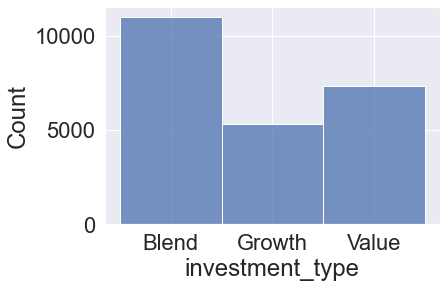

In [264]:
import seaborn as sns
sns.histplot(df_return['investment_type'])

<AxesSubplot:xlabel='size_type', ylabel='Count'>

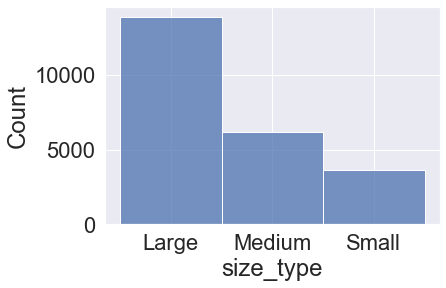

In [265]:
import seaborn as sns
sns.histplot(df_return['size_type'])

In [266]:
def violinplot(df_,col1,col2):
  sns.violinplot(x=df_[col1], y=df_[col2])
  plt.show()

In [267]:
rating_list

['rating',
 'median_market_cap',
 'return_rating',
 'risk_rating',
 'investment_strategy',
 'investment_type',
 'size_type',
 'fund_yield',
 'top10_holdings',
 'fund_return_ytd',
 'category_return_ytd',
 'fund_net_annual_expense_ratio',
 'net_asset_value',
 'category_net_annual_expense_ratio']

In [268]:
df_return[['rating','median_market_cap']].describe()

rating  median_market_cap
count  23781.000000       24794.000000
mean       3.032126       39238.487202
std        1.102552       51251.055463
min        1.000000           0.000000
25%        2.000000         321.740000
50%        3.000000       20772.240000
75%        4.000000       56773.910000
max        5.000000      408144.410000

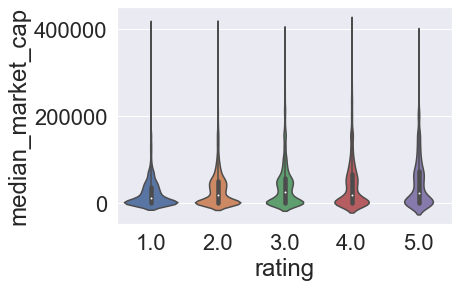

In [269]:
violinplot(df_return,'rating','median_market_cap')

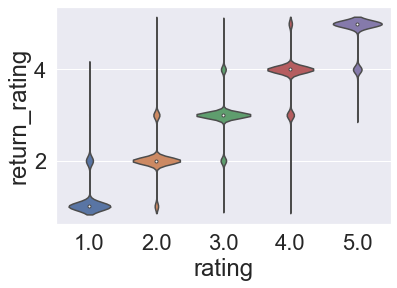

In [270]:
violinplot(df_return,'rating','return_rating')

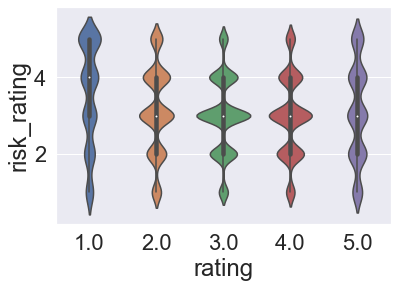

In [271]:
violinplot(df_return,'rating','risk_rating')

In [272]:
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24821 entries, 0 to 24820
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rating                             23781 non-null  float64
 1   median_market_cap                  24794 non-null  float64
 2   return_rating                      23749 non-null  float64
 3   risk_rating                        23781 non-null  float64
 4   investment_strategy                24821 non-null  object 
 5   investment_type                    23626 non-null  object 
 6   size_type                          23626 non-null  object 
 7   fund_yield                         24818 non-null  float64
 8   top10_holdings                     24780 non-null  object 
 9   fund_return_ytd                    24746 non-null  float64
 10  category_return_ytd                23815 non-null  float64
 11  fund_net_annual_expense_ratio      24821 non-null  flo

In [273]:
rating_list.remove('top10_holdings')
rating_list.remove('investment_strategy')
rating_list.remove('investment_type')
rating_list.remove('size_type')

In [274]:
list_rating = [(rating_list[i],rating_list[j]) for i in range(len(rating_list)) for j in range(i+1, len(rating_list))]

In [275]:
list_rating

[('rating', 'median_market_cap'),
 ('rating', 'return_rating'),
 ('rating', 'risk_rating'),
 ('rating', 'fund_yield'),
 ('rating', 'fund_return_ytd'),
 ('rating', 'category_return_ytd'),
 ('rating', 'fund_net_annual_expense_ratio'),
 ('rating', 'net_asset_value'),
 ('rating', 'category_net_annual_expense_ratio'),
 ('median_market_cap', 'return_rating'),
 ('median_market_cap', 'risk_rating'),
 ('median_market_cap', 'fund_yield'),
 ('median_market_cap', 'fund_return_ytd'),
 ('median_market_cap', 'category_return_ytd'),
 ('median_market_cap', 'fund_net_annual_expense_ratio'),
 ('median_market_cap', 'net_asset_value'),
 ('median_market_cap', 'category_net_annual_expense_ratio'),
 ('return_rating', 'risk_rating'),
 ('return_rating', 'fund_yield'),
 ('return_rating', 'fund_return_ytd'),
 ('return_rating', 'category_return_ytd'),
 ('return_rating', 'fund_net_annual_expense_ratio'),
 ('return_rating', 'net_asset_value'),
 ('return_rating', 'category_net_annual_expense_ratio'),
 ('risk_rating',

In [276]:
#for i in list_rating:
# col_1 = i[0]
#  col_2 = i[1]
#  print(col_1,col_2)
#  violinplot(df_return,str(col_1),str(col_2))
#  plt.title("Comparison between : " + col_1 + " and "+ col_2)
#  plt.show()

We now check the distribution chart for all the returns

In [277]:
def density(df_,column): 
  fig = sns.kdeplot(df_[column], shade=True, color="r")
  plt.show()

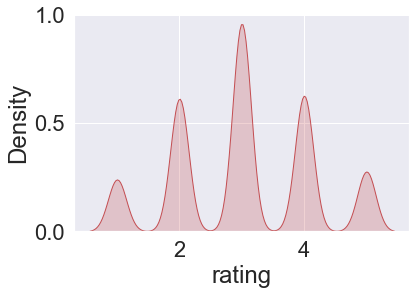

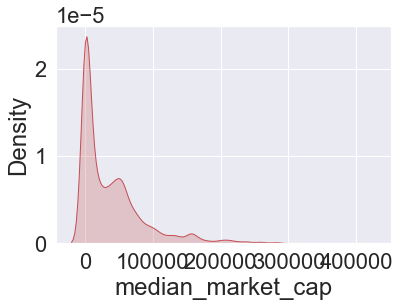

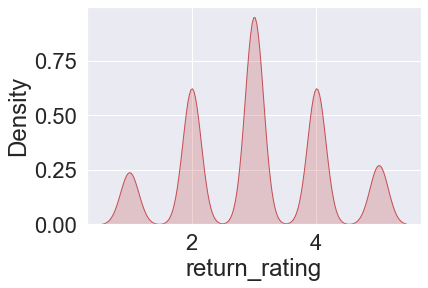

In [278]:
for i in rating_list[:3]:
  density(df_return,i)

The box plot to look at any outliers present in the data

In [279]:
def box_plot(df_,col1,col2):
  sns.boxplot( x=df[col1], y=df[col2])
  plt.title("Comparison between : " + col_1 + " and "+ col_2)
  plt.show()

rating median_market_cap


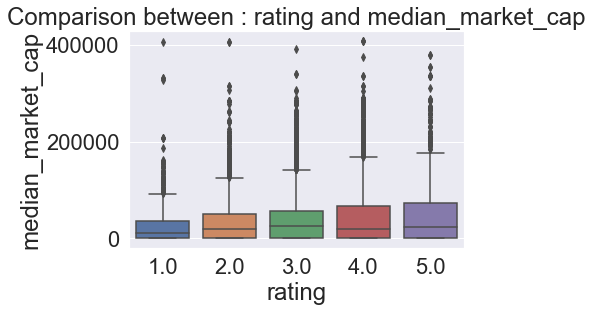

rating return_rating


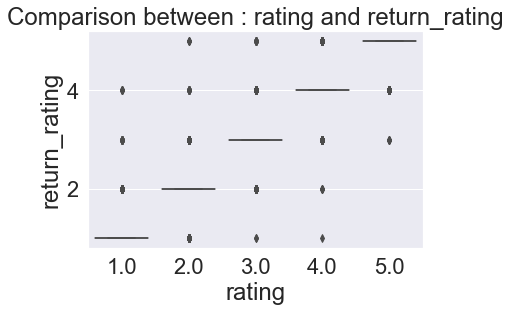

rating risk_rating


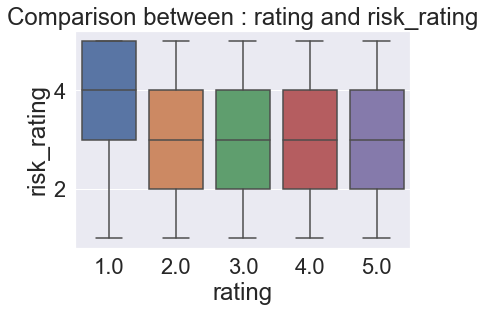

In [280]:
for i in list_rating[:3]:
  col_1 = i[0]
  col_2 = i[1]
  print(col_1,col_2)
  box_plot(df_return,str(col_1),str(col_2))
  

Finally Let us look at the correlation between the variables using a scatter plot and a Heatmap

In [281]:
def scatterplot(df_,col1,col2):
  plt.plot(col1,col2, "", data=df_, linestyle='', marker='o', markersize=0.5)
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title("Relation between " + col1 + " and "+ col2)
  plt.show()

rating median_market_cap


C:\Users\naren\AppData\Local\Temp\ipykernel_15080\129130186.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(col1,col2, "", data=df_, linestyle='', marker='o', markersize=0.5)


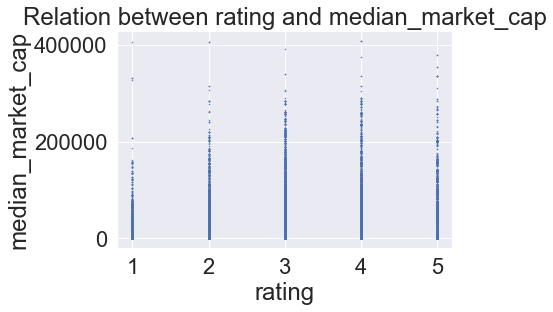

rating return_rating


C:\Users\naren\AppData\Local\Temp\ipykernel_15080\129130186.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(col1,col2, "", data=df_, linestyle='', marker='o', markersize=0.5)


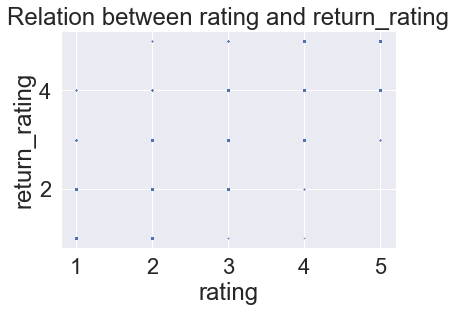

In [282]:
for i in list_rating[:2]:
  col_1 = i[0]
  col_2 = i[1]
  print(col_1,col_2)
  scatterplot(df_return,str(col_1),str(col_2))

Now let us look at the correlation between the mentioned variables

In [283]:
df_corr = df_return.corr()

<AxesSubplot:>

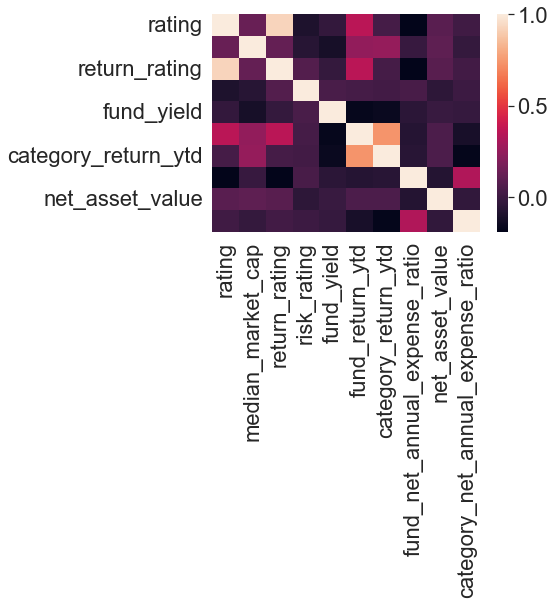

In [284]:
# We can observe how closely some of the variable such as rating and fund return are related more closely than the others. 
sns.heatmap(df_corr)

Asset analysis

In [285]:
df_asset

asset_cash  asset_stocks  asset_bonds  asset_others  asset_preferred  \
0            1.88         63.87        15.31         18.95             0.00   
1            3.49         48.14        48.37          0.00             0.00   
2            1.54         98.46         0.00          0.00             0.00   
3            2.75         78.52        18.48          0.01             0.07   
4            1.54         98.45         0.00          0.01             0.00   
...           ...           ...          ...           ...              ...   
24816        0.00         98.17         0.00          1.83             0.00   
24817        1.27         98.73         0.00          0.00             0.00   
24818        1.27         98.73         0.00          0.00             0.00   
24819        2.85         97.15         0.00          0.00             0.00   
24820        2.85         97.15         0.00          0.00             0.00   

       asset_convertable  rating  return_rating  risk_rating  \
0                   0.00     3.0            3.0          3.0   
1                   0.00     4.0            5.0          5.0   
2                   0.00     3.0            3.0          4.0   
3                   0.14     4.0            4.0          3.0   
4                   0.00     3.0            4.0          5.0   
...                  ...     ...            ...          ...   
24816               0.00     2.0            2.0          3.0   
24817               0.00     5.0            5.0          5.0   
24818               0.00     5.0            5.0          5.0   
24819               0.00     5.0            5.0          5.0   
24820               0.00     5.0            5.0          5.0   

                                     investment_strategy investment_type  \
0      The investment seeks total return in excess of...           Blend   
1      The investment seeks income; long-term growth ...           Blend   
2      The investment seeks long-term capital appreci...          Growth   
3      The investment seeks the highest level of tota...           Blend   
4      The investment seeks capital appreciation. The...           Blend   
...                                                  ...             ...   
24816  The investment seeks capital appreciation. The...          Growth   
24817  The investment seeks long-term capital appreci...          Growth   
24818  The investment seeks long-term capital appreci...          Growth   
24819  The investment seeks long-term capital appreci...          Growth   
24820  The investment seeks long-term capital appreci...          Growth   

      size_type  
0         Large  
1         Large  
2         Large  
3         Large  
4         Large  
...         ...  
24816     Small  
24817     Large  
24818     Large  
24819     Large  
24820     Large  

[24821 rows x 12 columns]

In [286]:
asset_bucket

['asset_cash',
 'asset_stocks',
 'asset_bonds',
 'asset_others',
 'asset_preferred',
 'asset_convertable']

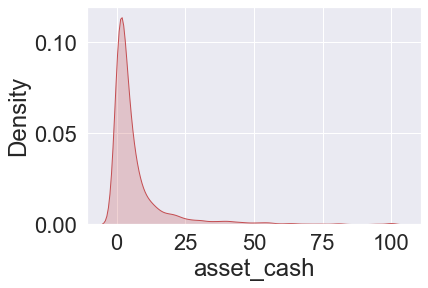

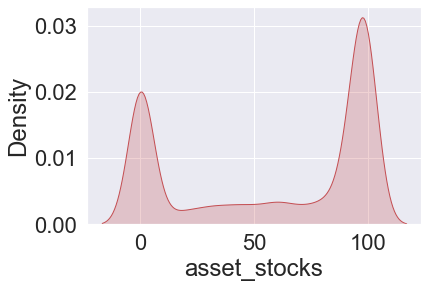

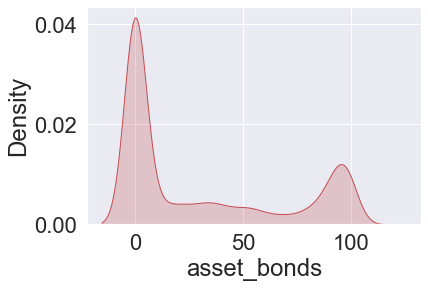

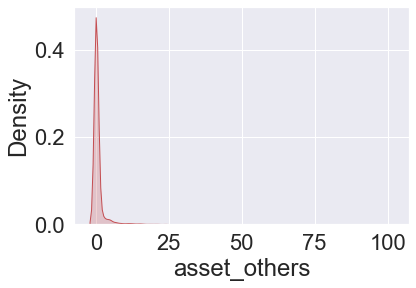

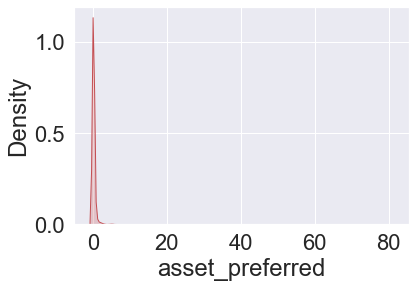

In [287]:
for i in asset_bucket[:5]:
  density(df_asset,i)

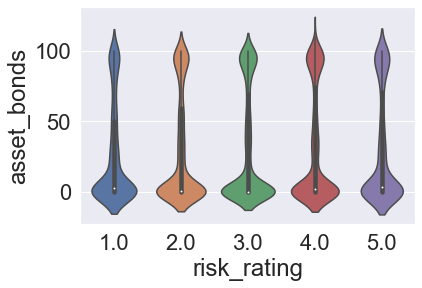

In [288]:
violinplot(df_asset,'risk_rating','asset_bonds')

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\129130186.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(col1,col2, "", data=df_, linestyle='', marker='o', markersize=0.5)


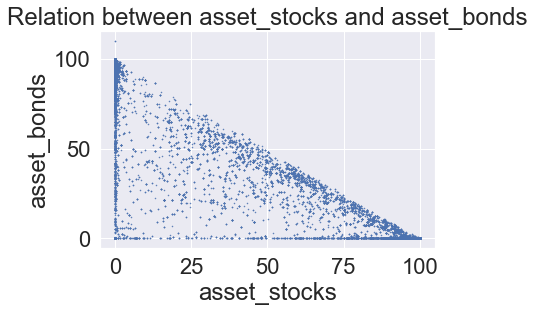

In [289]:
scatterplot(df_asset,'asset_stocks','asset_bonds')

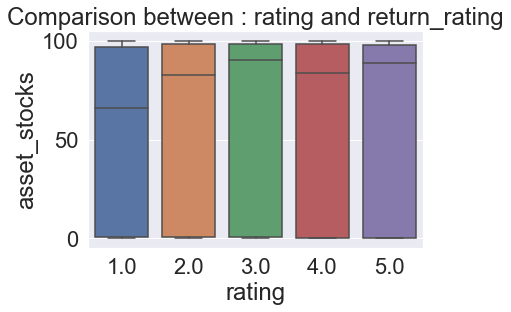

In [290]:
box_plot(df_asset,'rating','asset_stocks')

<AxesSubplot:>

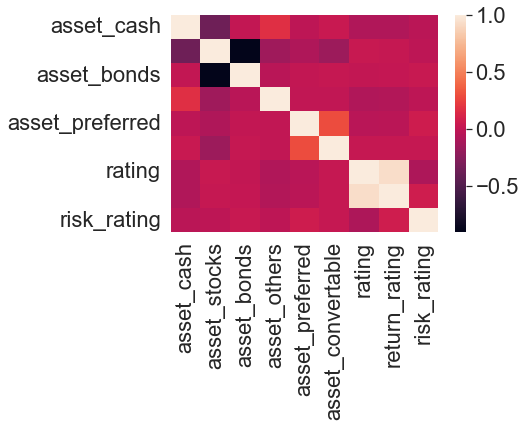

In [291]:
# We can observe that asset stocks and asset bonds are conversely related to each pther and similary rating and risk,return rating being closely related to each other

df_asset_corr = df_asset.corr()
sns.heatmap(df_asset_corr)

Analysis on price ratio, sector and credit

In [292]:
df_price_ratio

price_earnings_ratio  price_book_ratio  price_sales_ratio  \
0                     19.41              1.83               2.30   
1                     21.21              3.60               3.26   
2                     38.70             11.46               5.31   
3                     21.81              2.45               1.44   
4                     23.56              2.53               1.58   
...                     ...               ...                ...   
24816                 16.13              2.08               1.38   
24817                 58.41             16.99              12.56   
24818                 58.41             16.99              12.56   
24819                 56.27             15.29              12.59   
24820                 56.27             15.29              12.59   

       price_cashflow_ratio  rating  return_rating  risk_rating  \
0                     11.13     3.0            3.0          3.0   
1                     15.29     4.0            5.0          5.0   
2                     26.26     3.0            3.0          4.0   
3                     11.45     4.0            4.0          3.0   
4                     12.25     3.0            4.0          5.0   
...                     ...     ...            ...          ...   
24816                 10.70     2.0            2.0          3.0   
24817                 38.60     5.0            5.0          5.0   
24818                 38.60     5.0            5.0          5.0   
24819                 37.59     5.0            5.0          5.0   
24820                 37.59     5.0            5.0          5.0   

                                     investment_strategy investment_type  \
0      The investment seeks total return in excess of...           Blend   
1      The investment seeks income; long-term growth ...           Blend   
2      The investment seeks long-term capital appreci...          Growth   
3      The investment seeks the highest level of tota...           Blend   
4      The investment seeks capital appreciation. The...           Blend   
...                                                  ...             ...   
24816  The investment seeks capital appreciation. The...          Growth   
24817  The investment seeks long-term capital appreci...          Growth   
24818  The investment seeks long-term capital appreci...          Growth   
24819  The investment seeks long-term capital appreci...          Growth   
24820  The investment seeks long-term capital appreci...          Growth   

      size_type  
0         Large  
1         Large  
2         Large  
3         Large  
4         Large  
...         ...  
24816     Small  
24817     Large  
24818     Large  
24819     Large  
24820     Large  

[24821 rows x 10 columns]

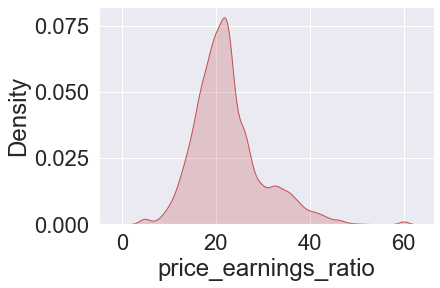

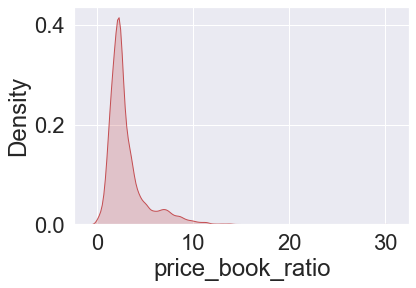

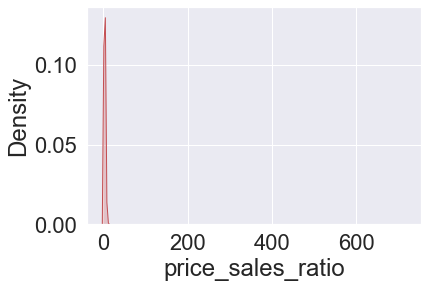

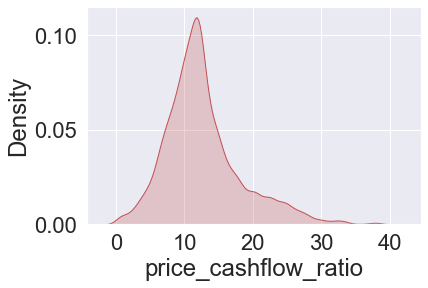

In [293]:
for i in price_ratio_bucket[:5]:
  density(df_price_ratio,i)

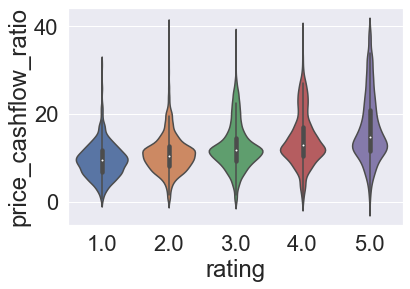

In [294]:
violinplot(df_price_ratio,'rating','price_cashflow_ratio')

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\129130186.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(col1,col2, "", data=df_, linestyle='', marker='o', markersize=0.5)


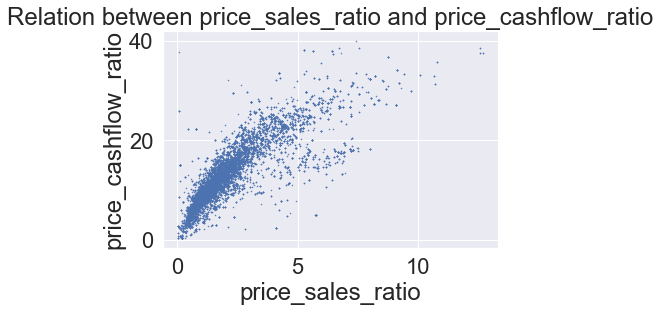

In [295]:
scatterplot(df_price_ratio,'price_sales_ratio','price_cashflow_ratio')

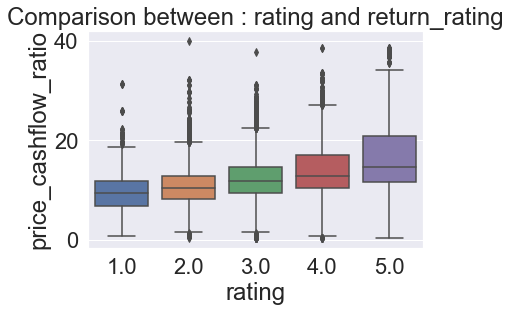

In [296]:
box_plot(df_price_ratio,'rating','price_cashflow_ratio')

<AxesSubplot:>

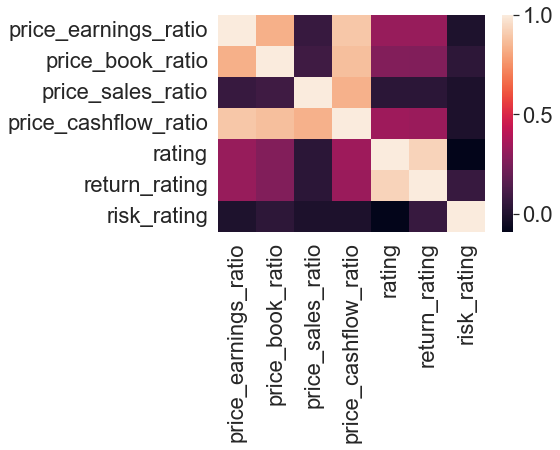

In [297]:
df_price_ratio_corr = df_price_ratio.corr()
sns.heatmap(df_price_ratio_corr)

Analysis on Sector

In [298]:
df_sector

sector_basic_materials  sector_consumer_cyclical  \
0                       13.52                      1.62   
1                        0.00                      9.36   
2                        1.09                     20.42   
3                        3.49                     12.79   
4                        4.06                     13.68   
...                       ...                       ...   
24816                    4.59                      6.44   
24817                    0.00                     28.04   
24818                    0.00                     28.04   
24819                    0.00                     23.50   
24820                    0.00                     23.50   

       sector_financial_services  sector_real_estate  \
0                           0.00               42.97   
1                          20.21                2.91   
2                          14.43                1.32   
3                          12.07                5.72   
4                          11.12                3.43   
...                          ...                 ...   
24816                      10.45                4.54   
24817                       1.41                0.00   
24818                       1.41                0.00   
24819                       3.80                1.95   
24820                       3.80                1.95   

       sector_consumer_defensive  sector_healthcare  sector_utilities  \
0                           1.54               0.00             15.29   
1                           5.30              13.74              5.63   
2                           0.86              12.87              0.00   
3                           7.54              14.48              2.49   
4                           6.93              13.01              3.08   
...                          ...                ...               ...   
24816                       4.22              15.43              5.67   
24817                       4.79               0.91              0.00   
24818                       4.79               0.91              0.00   
24819                       3.25              14.88              0.00   
24820                       3.25              14.88              0.00   

       sector_communication_services  sector_energy  sector_industrials  \
0                               1.67          11.53               11.87   
1                              15.68           0.00                4.24   
2                              11.63           0.00                3.20   
3                               7.36           2.31               11.89   
4                               9.66           2.26               10.02   
...                              ...            ...                 ...   
24816                           0.77           0.00               28.39   
24817                          25.14           0.00                2.47   
24818                          25.14           0.00                2.47   
24819                          14.41           0.00                0.00   
24820                          14.41           0.00                0.00   

       sector_technology  rating  return_rating  risk_rating  \
0                   0.00     3.0            3.0          3.0   
1                  22.93     4.0            5.0          5.0   
2                  34.18     3.0            3.0          4.0   
3                  19.86     4.0            4.0          3.0   
4                  22.74     3.0            4.0          5.0   
...                  ...     ...            ...          ...   
24816              19.48     2.0            2.0          3.0   
24817              37.24     5.0            5.0          5.0   
24818              37.24     5.0            5.0          5.0   
24819              38.23     5.0            5.0          5.0   
24820              38.23     5.0            5.0          5.0   

                                     investment_strategy investment_type  \
0 

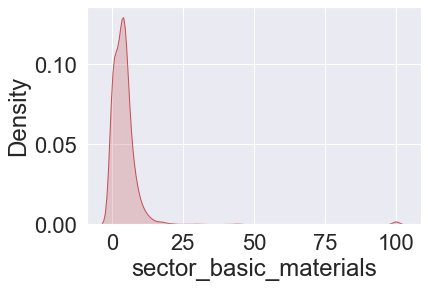

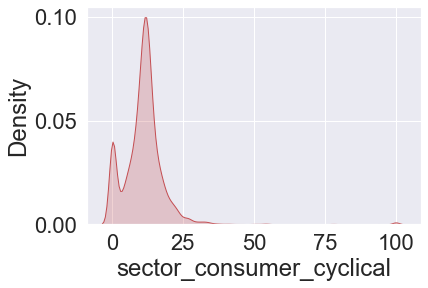

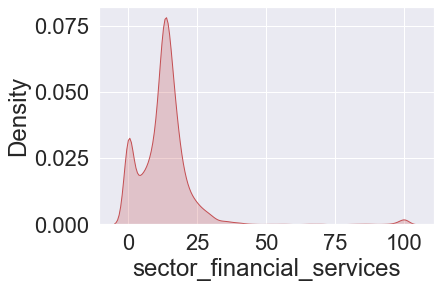

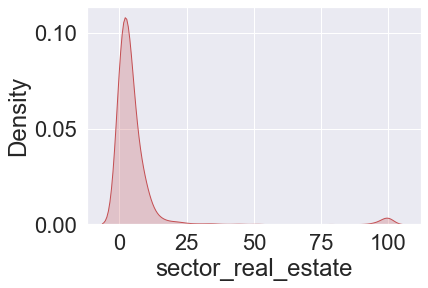

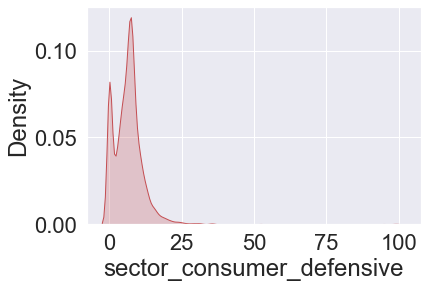

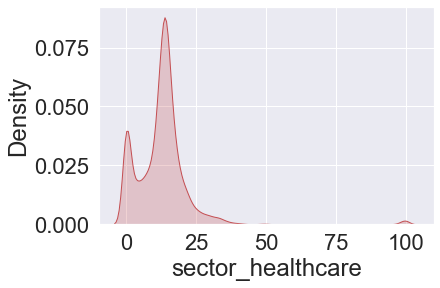

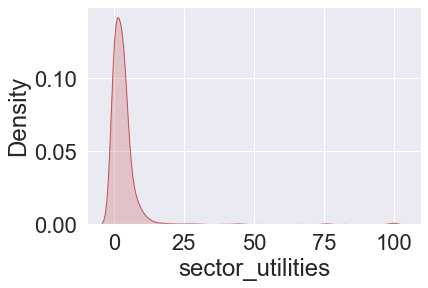

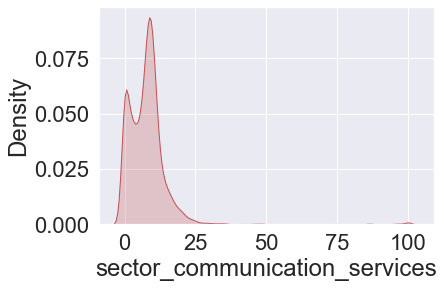

In [299]:
for i in sector_bucket[:8]:
  density(df_sector,i)

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\129130186.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(col1,col2, "", data=df_, linestyle='', marker='o', markersize=0.5)


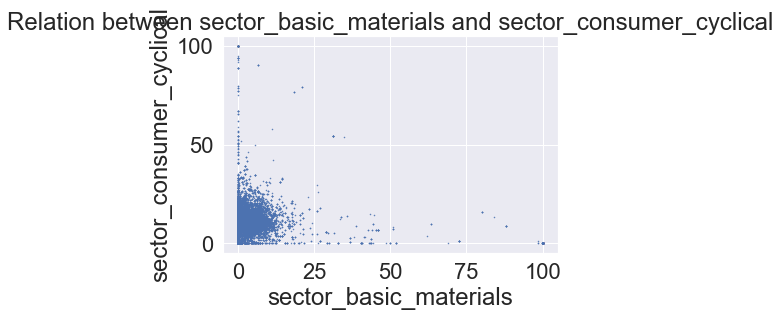

In [300]:
scatterplot(df_sector,'sector_basic_materials','sector_consumer_cyclical')	

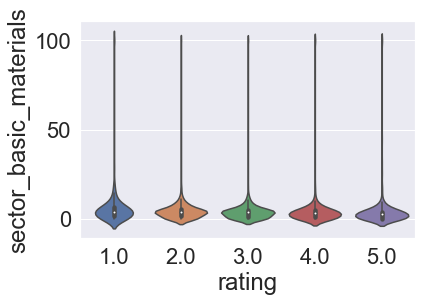

In [301]:
violinplot(df_sector,'rating','sector_basic_materials')

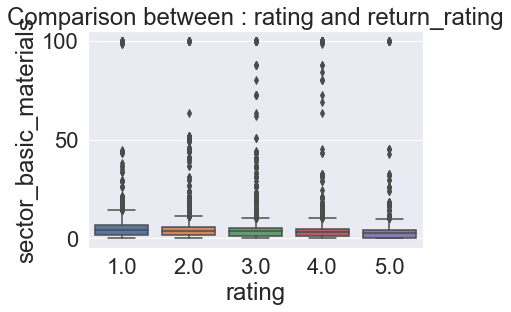

In [302]:
box_plot(df_sector,'rating','sector_basic_materials')

<AxesSubplot:>

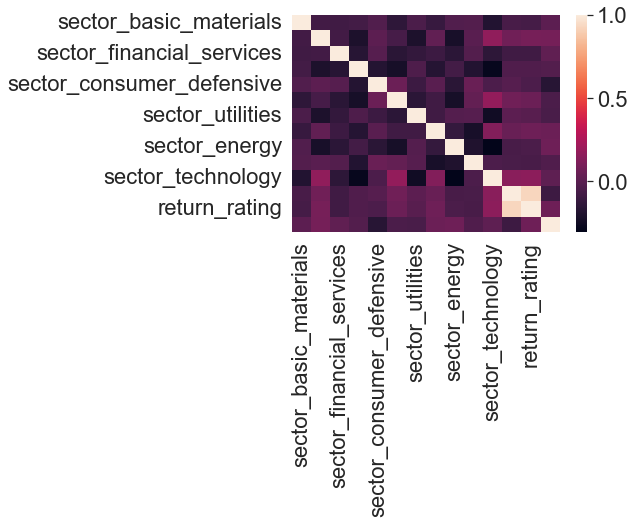

In [303]:
# Most of them are unrelated and that is to be expected since we are making a comparison between different sectors. 

df_sector_corr = df_sector.corr()
sns.heatmap(df_sector_corr)

Credit

In [304]:
# A huge number of missing values Let's look at it later

df_credit.isna().sum()/len(df_credit)

bond_maturity           0.393538
bond_duration           0.347730
credit_us_government    0.595826
credit_aaa              0.595826
credit_aa               0.595826
credit_a                0.595826
credit_bbb              0.595826
credit_bb               0.595826
credit_b                0.595826
credit_below_b          0.595826
credit_other_ratings    0.595826
rating                  0.041900
return_rating           0.043189
risk_rating             0.041900
investment_strategy     0.000000
investment_type         0.048145
size_type               0.048145
dtype: float64

Year wise Analysis of different Stocks and their Returns

In [305]:
df_fund_return = df[fund_return_bucket+bucket_1_list]

In [306]:
df_fund_return

fund_return_1month  category_return_1month  fund_return_3months  \
0                   -1.71                   -1.49                -1.02   
1                    0.30                   -1.33                 4.70   
2                   -4.57                   -2.64                 1.48   
3                   -1.32                   -1.46                 1.22   
4                   -2.43                   -1.46                 0.56   
...                   ...                     ...                  ...   
24816                1.98                    2.19                 1.70   
24817               -0.51                   -2.64                13.86   
24818               -0.54                   -2.64                13.79   
24819               -1.62                   -2.64                 7.60   
24820               -1.57                   -2.64                 7.69   

       category_return_3months  fund_return_1year  category_return_1year  \
0                        -1.00              -5.22                  -2.08   
1                        -0.15              15.76                   3.88   
2                         1.64              32.91                  25.92   
3                         0.19               8.36                   1.83   
4                        -0.58               1.73                   1.54   
...                        ...                ...                    ...   
24816                     2.61             -15.16                  -6.45   
24817                     1.64             114.69                  25.92   
24818                     1.64             114.08                  25.92   
24819                     1.64             102.21                  25.92   
24820                     1.64             102.77                  25.92   

       fund_return_3years  category_return_3years  fund_return_5years  \
0                    3.03                    1.10                4.08   
1                    9.71                    4.90                8.46   
2                   19.44                   15.98               15.26   
3                    6.79                    3.98                8.19   
4                    3.04                    2.24                5.73   
...                   ...                     ...                 ...   
24816               -5.61                   -0.55                3.04   
24817               39.68                   15.98               33.42   
24818               39.38                   15.98               33.07   
24819               39.15                   15.98               28.25   
24820               39.47                   15.98               28.57   

       category_return_5years  ...  fund_return_2011  category_return_2011  \
0                        3.97  ...             -3.46                 -3.99   
1                        6.23  ...               NaN                   NaN   
2                       14.64  ...             -6.29                 -2.46   
3                        6.21  ...             -1.67                 -3.80   
4                        4.36  ...               NaN                   NaN   
...                       ...  ...               ...                   ...   
24816                    5.00  ...               NaN                   NaN   
24817                   14.64  ...               NaN                   NaN   
24818                   14.64  ...               NaN                   NaN   
24819                   14.64  ...               NaN                   NaN   
24820                   14.64  ...               NaN                   NaN   

       fund_return_2010  category_return_2010  fund_symbol  \
0                 12.20                 10.58        AAAAX   
1                   NaN                   NaN        AAADX   
2                  9.70                 15.53        AAAGX   
3                 15.62                 13.49        AAAIX   
4                   NaN                   NaN        AAANX   
...                

In [307]:
def get_transformed(data,stock):
  df_data = data[data['fund_symbol'] == stock]
  return df_data

In [308]:
#for word in range(len(lis_fund_return)):
#  lis_fund_return[word] = lis_fund_return[word][12:]

In [309]:
#lis_fund_return

In [310]:
def plot_param(data,input,stock):
  st = ""
  len_ = 0
  df_data = data
  lis_fund_return = []
  if input == 1:
    st = 'fund_return'
    data = df_fund_return
    df_data = data[data['fund_symbol'] == stock]
    len_ = len(st)
    lis_fund_return = df_data.filter(regex='^fund_return',axis=1).columns.tolist()
  if input == 2:
    st = 'category_return'
    data = df_fund_return
    df_data = data[data['fund_symbol'] == stock]
    len_ = len(st)
    lis_fund_return = df_data.filter(regex='^category_return',axis=1).columns.tolist()

  if input == 3:
    st = 'treynor'
    data = df[treynor_bucket+bucket_1_list]
    df_data = data[data['fund_symbol'] == stock]
    len_ = len(st)
    lis_fund_return = df_data.filter(regex='^treynor',axis=1).columns.tolist()

  x = lis_fund_return
  y = df_data[lis_fund_return].values.tolist()[0]
  x.reverse()
  y.reverse()

  for i in range(len(x)):
    x[i] = x[i][len_+1:]

  plt.figure(figsize=(10,10)) 
  plt.plot(x,y,linestyle='-', marker='o')
  plt.show()

In [311]:
df[treynor_bucket+bucket_1_list]

fund_treynor_ratio_3years  category_treynor_ratio_3years  \
0                          1.32                          -0.00   
1                          6.82                           0.03   
2                         16.87                           0.14   
3                           3.7                           0.02   
4                          0.86                           0.01   
...                         ...                            ...   
24816                     -6.34                          -0.02   
24817                     26.75                           0.14   
24818                     26.54                           0.14   
24819                     29.58                           0.14   
24820                     29.82                           0.14   

       fund_treynor_ratio_5years  category_treynor_ratio_5years  \
0                           2.77                           0.03   
1                           5.38                           0.05   
2                          13.48                           0.13   
3                           5.05                           0.04   
4                           2.73                           0.04   
...                          ...                            ...   
24816                       1.62                           0.03   
24817                      22.44                           0.13   
24818                      22.21                           0.13   
24819                      21.10                           0.13   
24820                      21.34                           0.13   

      fund_treynor_ratio_10years  category_treynor_ratio_10years fund_symbol  \
0                           1.91                            0.04       AAAAX   
1                            7.1                            0.06       AAADX   
2                          13.03                            0.13       AAAGX   
3                           5.87                            0.05       AAAIX   
4                            NaN                            0.04       AAANX   
...                          ...                             ...         ...   
24816                        NaN                            0.07       ZSCIX   
24817                        NaN                            0.13       ZVGIX   
24818                        NaN                            0.13       ZVGNX   
24819                        NaN                            0.13       ZVNBX   
24820                        NaN                            0.13       ZVNIX   

                                      fund_extended_name  \
0                   DWS RREEF Real Assets Fund - Class A   
1                   Aberdeen Income Builder Fund Class A   
2                 Thrivent Large Cap Growth Fund Class A   
3      American Century Strategic Allocation: Aggress...   
4      Horizon Active Asset Allocation Fund Investor ...   
...                                                  ...   
24816      Zacks Small-Cap Core Fund Institutional Class   
24817         Zevenbergen Genea Fund Institutional Class   
24818              Zevenbergen Genea Fund Investor Class   
24819             Zevenbergen Growth Fund Investor Class   
24820        Zevenbergen Growth Fund Institutional Class   

                           fund_family inception_date  \
0                                  DWS     2007-07-29   
1                             Aberdeen     2011-12-29   
2                       Thrivent Funds     1999-10-28   
3         American Century Investments     2000-07-31   
4                  Horizon Investments     2012-01-30   
...                                ...            ...   
24816                      Zacks Funds     2014-02-27   
24817  Zevenbergen Capital Investments     2015-08-30   
24818  Zevenbergen Capital Investments     2015-08-30   
24819  Zevenbergen Capital Investments     2015-08-30   
24820  Zevenbergen Capital Investments     2015-08-30   

                             category cur

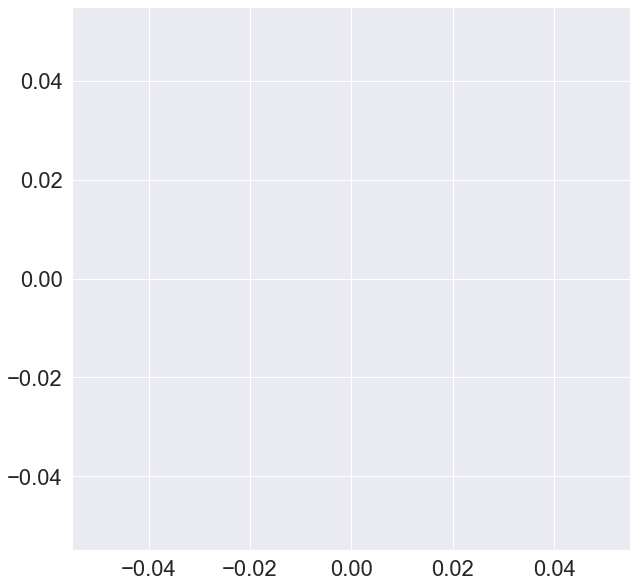

In [312]:
plot_param(df,3,'AAAGX')

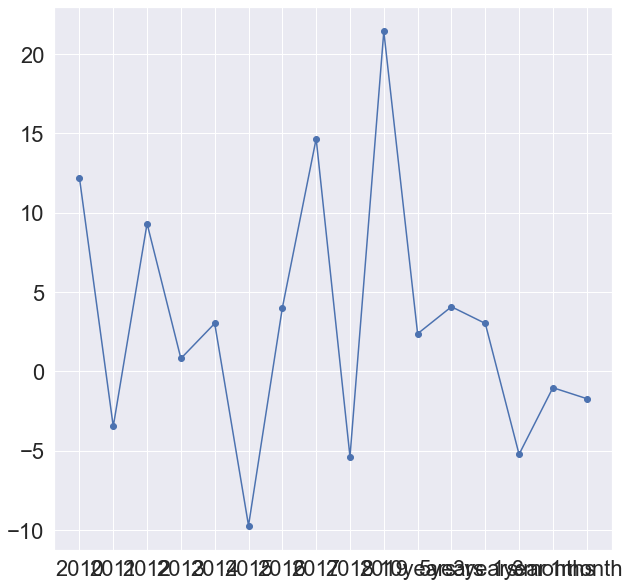

In [313]:
lis_fund_return = df_fund_return.filter(regex='^fund_return',axis=1).columns.tolist()

transformed = get_transformed(df_fund_return,'AAAAX')

x = lis_fund_return
y = transformed[lis_fund_return].values.tolist()[0]
x.reverse()
y.reverse()

for i in range(len(x)):
  x[i] = x[i][12:]

plt.figure(figsize=(10,10)) 
plt.plot(x,y,linestyle='-', marker='o')
plt.show()

# lis_fund_return

In [314]:
    df_etf = pd.read_csv('ETFs.csv', index_col=False)
    df_mf = pd.read_csv('Mutual Funds.csv', index_col=False)

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\1371108866.py:2: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mf = pd.read_csv('Mutual Funds.csv', index_col=False)


In [315]:
df_etf

fund_name                                 fund_extended_name  \
0         1305                                    Daiwa ETF TOPIX   
1         1306                                   Nomura TOPIX ETF   
2         1308                  Nikko Exchange Traded Index TOPIX   
3         1309                        Nomura SSE50 Index Link ETF   
4         1310                            Daiwa ETF TOPIX Core 30   
...        ...                                                ...   
2347      ZBIO      ProShares UltraPro Short Nasdaq Biotechnology   
2348       ZIV   VelocityShares Daily Inverse VIX Medium-Term ETN   
2349      ZMLP        Direxion Zacks MLP High Income Index Shares   
2350      ZROZ  PIMCO 25+ Year Zero Coupon U.S. Treasury Index...   
2351       ZSL                        ProShares UltraShort Silver   

                           category                     fund_family  \
0                               NaN   Daiwa Asset Management Co Ltd   
1                               NaN  Nomura Asset Management Co Ltd   
2                               NaN   Nikko Asset Management Co Ltd   
3                               NaN  Nomura Asset Management Co Ltd   
4                               NaN   Daiwa Asset Management Co Ltd   
...                             ...                             ...   
2347       Trading - Inverse Equity                       ProShares   
2348                     Volatility                Credit Suisse AG   
2349     Energy Limited Partnership                  Direxion Funds   
2350                Long Government                           PIMCO   
2351  Trading - Inverse Commodities                       ProShares   

        net_assets  ytd_return  fund_yield            legal_type investment  \
0     4.010000e+12         NaN        1.84  Exchange Traded Fund      Blend   
1     8.430000e+12         NaN        1.77  Exchange Traded Fund      Blend   
2     3.730000e+12         NaN        1.84  Exchange Traded Fund      Blend   
3     4.450000e+09         NaN        0.00  Exchange Traded Fund      Value   
4     1.920000e+09         NaN        2.57  Exchange Traded Fund      Blend   
...            ...         ...         ...                   ...        ...   
2347  4.630000e+06      -33.01        0.14  Exchange Traded Fund        NaN   
2348  9.908000e+07       25.94        0.00  Exchange Traded Fund        NaN   
2349  5.092000e+07       18.43       11.78  Exchange Traded Fund      Value   
2350  1.997400e+08        3.21        2.74  Exchange Traded Fund        NaN   
2351  1.634000e+07        6.81        0.00  Exchange Traded Fund        NaN   

        size  ... fund_sharpe_ratio_5years  category_sharpe_ratio_5years  \
0      Large  ...                     0.59                           NaN   
1      Large  ...                     0.59                           NaN   
2      Large  ...                     0.59                           NaN   
3      Large  ...                     0.36                           NaN   
4      Large  ...                     0.34                           NaN   
...      ...  ...                      ...                           ...   
2347     NaN  ...                     0.00                           NaN   
2348     NaN  ...                     0.57                           NaN   
2349  Medium  ...                    -0.45                          0.19   
2350     NaN  ...                     0.49                          0.54   
2351     NaN  ...                     0.14                           NaN   

      fund_sharpe_ratio_10years  category_sharpe_ratio_10years  \
0                          0.60                            NaN   
1                          0.61                            NaN   
2                          0.60                            NaN   
3                          0.26                            NaN   
4                          0.44                            NaN   
...                         ...                            ...   

In [316]:
df_mf

fund_name                                 fund_extended_name  \
0         AAAAX               DWS RREEF Real Assets Fund - Class A   
1         AAADX               Aberdeen Income Builder Fund Class A   
2         AAAGX             Thrivent Large Cap Growth Fund Class A   
3         AAAIX  American Century Strategic Allocation: Aggress...   
4         AAANX  Horizon Active Asset Allocation Fund Investor ...   
...         ...                                                ...   
25303     ZSCIX      Zacks Small-Cap Core Fund Institutional Class   
25304     ZVGIX         Zevenbergen Genea Fund Institutional Class   
25305     ZVGNX              Zevenbergen Genea Fund Investor Class   
25306     ZVNBX             Zevenbergen Growth Fund Investor Class   
25307     ZVNIX        Zevenbergen Growth Fund Institutional Class   

                             category                      fund_family  \
0                    World Allocation                              DWS   
1                         Large Blend                         Aberdeen   
2                        Large Growth                   Thrivent Funds   
3      Allocation - 70% to 85% Equity     American Century Investments   
4                 Tactical Allocation              Horizon Investments   
...                               ...                              ...   
25303                     Small Blend                      Zacks Funds   
25304                    Large Growth  Zevenbergen Capital Investments   
25305                    Large Growth  Zevenbergen Capital Investments   
25306                    Large Growth  Zevenbergen Capital Investments   
25307                    Large Growth  Zevenbergen Capital Investments   

         net_assets  ytd_return  fund_yield  morningstar_rating  \
0      5.302800e+08       12.79        1.43                   3   
1      8.884000e+07        9.21        2.62                   2   
2      1.080000e+09       16.00        0.00                   3   
3      7.852700e+08       11.57        1.38                   4   
4      5.271300e+08       11.62        0.66                   4   
...             ...         ...         ...                 ...   
25303  1.244900e+08       11.18        0.00                   4   
25304  4.071000e+07       27.99        0.00                   5   
25305  4.071000e+07       27.93        0.00                   5   
25306  1.722000e+07       26.12        0.00                   5   
25307  1.722000e+07       26.27        0.00                   5   

      inception_date investment  ... fund_sharpe_ratio_5years  \
0         2007-07-29      Blend  ...                     0.31   
1         2011-12-29      Blend  ...                     0.62   
2         1999-10-28     Growth  ...                     0.86   
3         2000-07-31     Growth  ...                     0.63   
4         2012-01-30      Blend  ...                     0.47   
...              ...        ...  ...                      ...   
25303     2014-02-27      Blend  ...                     0.48   
25304     2015-08-30     Growth  ...                      NaN   
25305     2015-08-30     Growth  ...                      NaN   
25306     2015-08-30     Growth  ...                      NaN   
25307     2015-08-30     Growth  ...                      NaN   

      category_sharpe_ratio_5years  fund_sharpe_ratio_10years  \
0                             0.00                       0.73   
1                             0.01                       0.97   
2                             0.01                       1.01   
3                             0.01                       1.00   
4                             0.00                        NaN   
...                            ...                        ...   
25303                         0.00                        NaN   
25304                         0.01                        NaN   
25305                         0.01                        NaN   
25306                         0.01      

In [317]:
df_mf.describe()

net_assets    ytd_return    fund_yield  morningstar_rating  \
count  2.518700e+04  25198.000000  25179.000000        25308.000000   
mean   3.469205e+09      9.288682      1.851062            2.839893   
std    1.820032e+10      5.801856      1.803057            1.277439   
min    1.916000e+04    -36.300000      0.000000            0.000000   
25%    9.242000e+07      4.432500      0.480000            2.000000   
50%    4.396700e+08      9.820000      1.660000            3.000000   
75%    1.620000e+09     13.080000      2.640000            4.000000   
max    7.727200e+11     46.290000     45.360000            5.000000   

       net_annual_expense_ratio_fund  net_annual_expense_ratio_category  \
count                   25308.000000                       25308.000000   
mean                        1.121842                           1.013755   
std                         0.608839                           0.328955   
min                         0.000000                           0.390000   
25%                         0.720000                           0.810000   
50%                         1.010000                           1.020000   
75%                         1.440000                           1.180000   
max                        15.170000                           2.600000   

       portfolio_cash  portfolio_stocks  portfolio_bonds  portfolio_others  \
count    25193.000000      25193.000000     25193.000000      25193.000000   
mean         7.382432         59.110786        30.787085          1.057579   
std         12.899733         42.253861        38.686422          4.452199   
min          0.000000          0.000000         0.000000          0.000000   
25%          1.240000          0.530000         0.000000          0.000000   
50%          3.140000         82.650000         2.170000          0.000000   
75%          7.040000         97.600000        64.060000          0.280000   
max        100.000000        100.000000       100.000000         98.840000   

       ...  category_standard_deviation_10years  fund_sharpe_ratio_3years  \
count  ...                         25200.000000              23639.000000   
mean   ...                             0.109407                  0.681911   
std    ...                             0.055224                  0.462238   
min    ...                             0.000000                 -4.390000   
25%    ...                             0.060000                  0.440000   
50%    ...                             0.120000                  0.740000   
75%    ...                             0.150000                  0.970000   
max    ...                             0.340000                  4.160000   

       category_sharpe_ratio_3years  fund_sharpe_ratio_5years  \
count                  25200.000000              21414.000000   
mean                       0.007154                  0.517431   
std                        0.004642                  0.362774   
min                       -0.010000                 -5.140000   
25%                        0.000000                  0.330000   
50%                        0.010000                  0.550000   
75%                        0.010000                  0.730000   
max                        0.010000                  3.220000   

       category_sharpe_ratio_5years  fund_sharpe_ratio_10years  \
count                  25200.000000               16622.000000   
mean                       0.005973                   0.937074   
std                        0.005037                   0.342908   
min                       -0.010000                  -6.580000   
25%                        0.000000                   0.800000   
50%                        0.010000                   0.960000   
75%                        0.010000                   1.120000   
max                        0.010000                   3.010000   

       category_sharpe_ratio_10years  category_treynor_ratio_3years  \
count                   25200.000000        

In [318]:
df_etf.describe()


net_assets   ytd_return   fund_yield  net_annual_expense_ratio_fund  \
count  2.332000e+03  2116.000000  2335.000000                    2352.000000   
mean   2.085575e+10    11.059149     2.125953                       0.498065   
std    2.920198e+11    15.521658     2.128254                       0.414213   
min    1.967800e+05   -73.090000     0.000000                       0.000000   
25%    2.473750e+07     4.275000     0.790000                       0.220000   
50%    1.406200e+08    12.030000     1.810000                       0.450000   
75%    8.255550e+08    17.202500     2.860000                       0.680000   
max    8.430000e+12   161.530000    22.710000                       9.410000   

       net_annual_expense_ratio_category  portfolio_stocks  portfolio_bonds  \
count                        1832.000000       2348.000000      2348.000000   
mean                            0.536299         64.274280        14.568254   
std                             0.224406         45.699238        32.925439   
min                             0.000000          0.000000         0.000000   
25%                             0.370000          0.000000         0.000000   
50%                             0.470000         98.880000         0.000000   
75%                             0.670000         99.790000         0.000000   
max                             1.190000        100.000000       100.000000   

       price_earnings   price_book  price_sales  ...  \
count     2348.000000  2348.000000  2348.000000  ...   
mean        10.501129     1.434983     1.112504  ...   
std          8.313881     1.331660     1.235441  ...   
min          0.000000     0.000000     0.000000  ...   
25%          0.000000     0.000000     0.000000  ...   
50%         12.625000     1.410000     0.980000  ...   
75%         15.940000     2.100000     1.572500  ...   
max         49.270000    10.770000    10.150000  ...   

       fund_sharpe_ratio_3years  category_sharpe_ratio_3years  \
count               2251.000000                   1451.000000   
mean                   0.381279                      0.516072   
std                    0.571044                      0.553095   
min                   -6.980000                     -0.980000   
25%                    0.000000                      0.120000   
50%                    0.430000                      0.500000   
75%                    0.750000                      0.940000   
max                    3.430000                      2.710000   

       fund_sharpe_ratio_5years  category_sharpe_ratio_5years  \
count               2162.000000                   1439.000000   
mean                   0.200856                      0.754121   
std                    0.483405                      0.531906   
min                   -5.990000                     -1.250000   
25%                    0.000000                      0.310000   
50%                    0.040000                      0.900000   
75%                    0.520000                      1.210000   
max                    2.970000                      1.620000   

       fund_sharpe_ratio_10years  category_sharpe_ratio_10years  \
count                2013.000000                    1131.000000   
mean                    0.212474                       0.351512   
std                     0.463383                       0.238949   
min                    -5.250000                      -0.360000   
25%                     0.000000                       0.180000   
50%                     0.000000                       0.380000   
75%                     0.470000                       0.480000   
max                     2.400000                       1.150000   

       category_treynor_ratio_3years  fund_treynor_ratio_5years  \
count                    1451.000000                2162.000000   
mean                        4.087850                   2.531253   
std                        22.587484                  21.427333   
min                      -2

In [319]:
df_mf.dtypes


fund_name                          object
fund_extended_name                 object
category                           object
fund_family                        object
net_assets                        float64
                                   ...   
category_treynor_ratio_3years     float64
fund_treynor_ratio_5years          object
category_treynor_ratio_5years     float64
fund_treynor_ratio_10years         object
category_treynor_ratio_10years    float64
Length: 125, dtype: object

In [320]:
df_etf.dtypes


fund_name                          object
fund_extended_name                 object
category                           object
fund_family                        object
net_assets                        float64
                                   ...   
category_treynor_ratio_3years     float64
fund_treynor_ratio_5years         float64
category_treynor_ratio_5years      object
fund_treynor_ratio_10years        float64
category_treynor_ratio_10years    float64
Length: 104, dtype: object

In [321]:
def hist_bar_plot(df, rc_num=(2, 6), size=(16 * 3, 9 * 3), unique=True):
    """
    Creates histogram and bar visualizations for 
    a given DataFrame. Depending on the DataFrame 
    attribute type, numerical or categorical, it 
    creates a histogram or bar plot respectively.
    
    Arguments:
        df: Dataset pandas DataFrame.
        rc_num: Number of rows and columns.
        size: Size of the plot.
        unique: If True, it reduces the number of 
        attributes that will be visualized using 
        the number of unique values as a heuristic.
    """
    # Chose adequate columns for visualization
    # Chose adequate columns for visualization
    num_unique_col = df.nunique()
    df = df[[col for col in df if 1 < num_unique_col[col] < 50]]

    # Create Hist and Bar plots
    plt.figure(figsize=size)
    for i, col in enumerate(df):
        plt.subplot(rc_num[0], rc_num[1], i + 1)
        df_column = df[col]
        if np.issubdtype(type(df_column.iloc[0]), np.number):
            df_column.hist()
        else:
            df_column.value_counts().plot.bar()
        plt.title(col, fontsize=25)
        plt.xticks(rotation=30, fontsize=30)
        plt.yticks(fontsize=30)
        plt.ylabel('counts')

        if i == 10:
            break
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

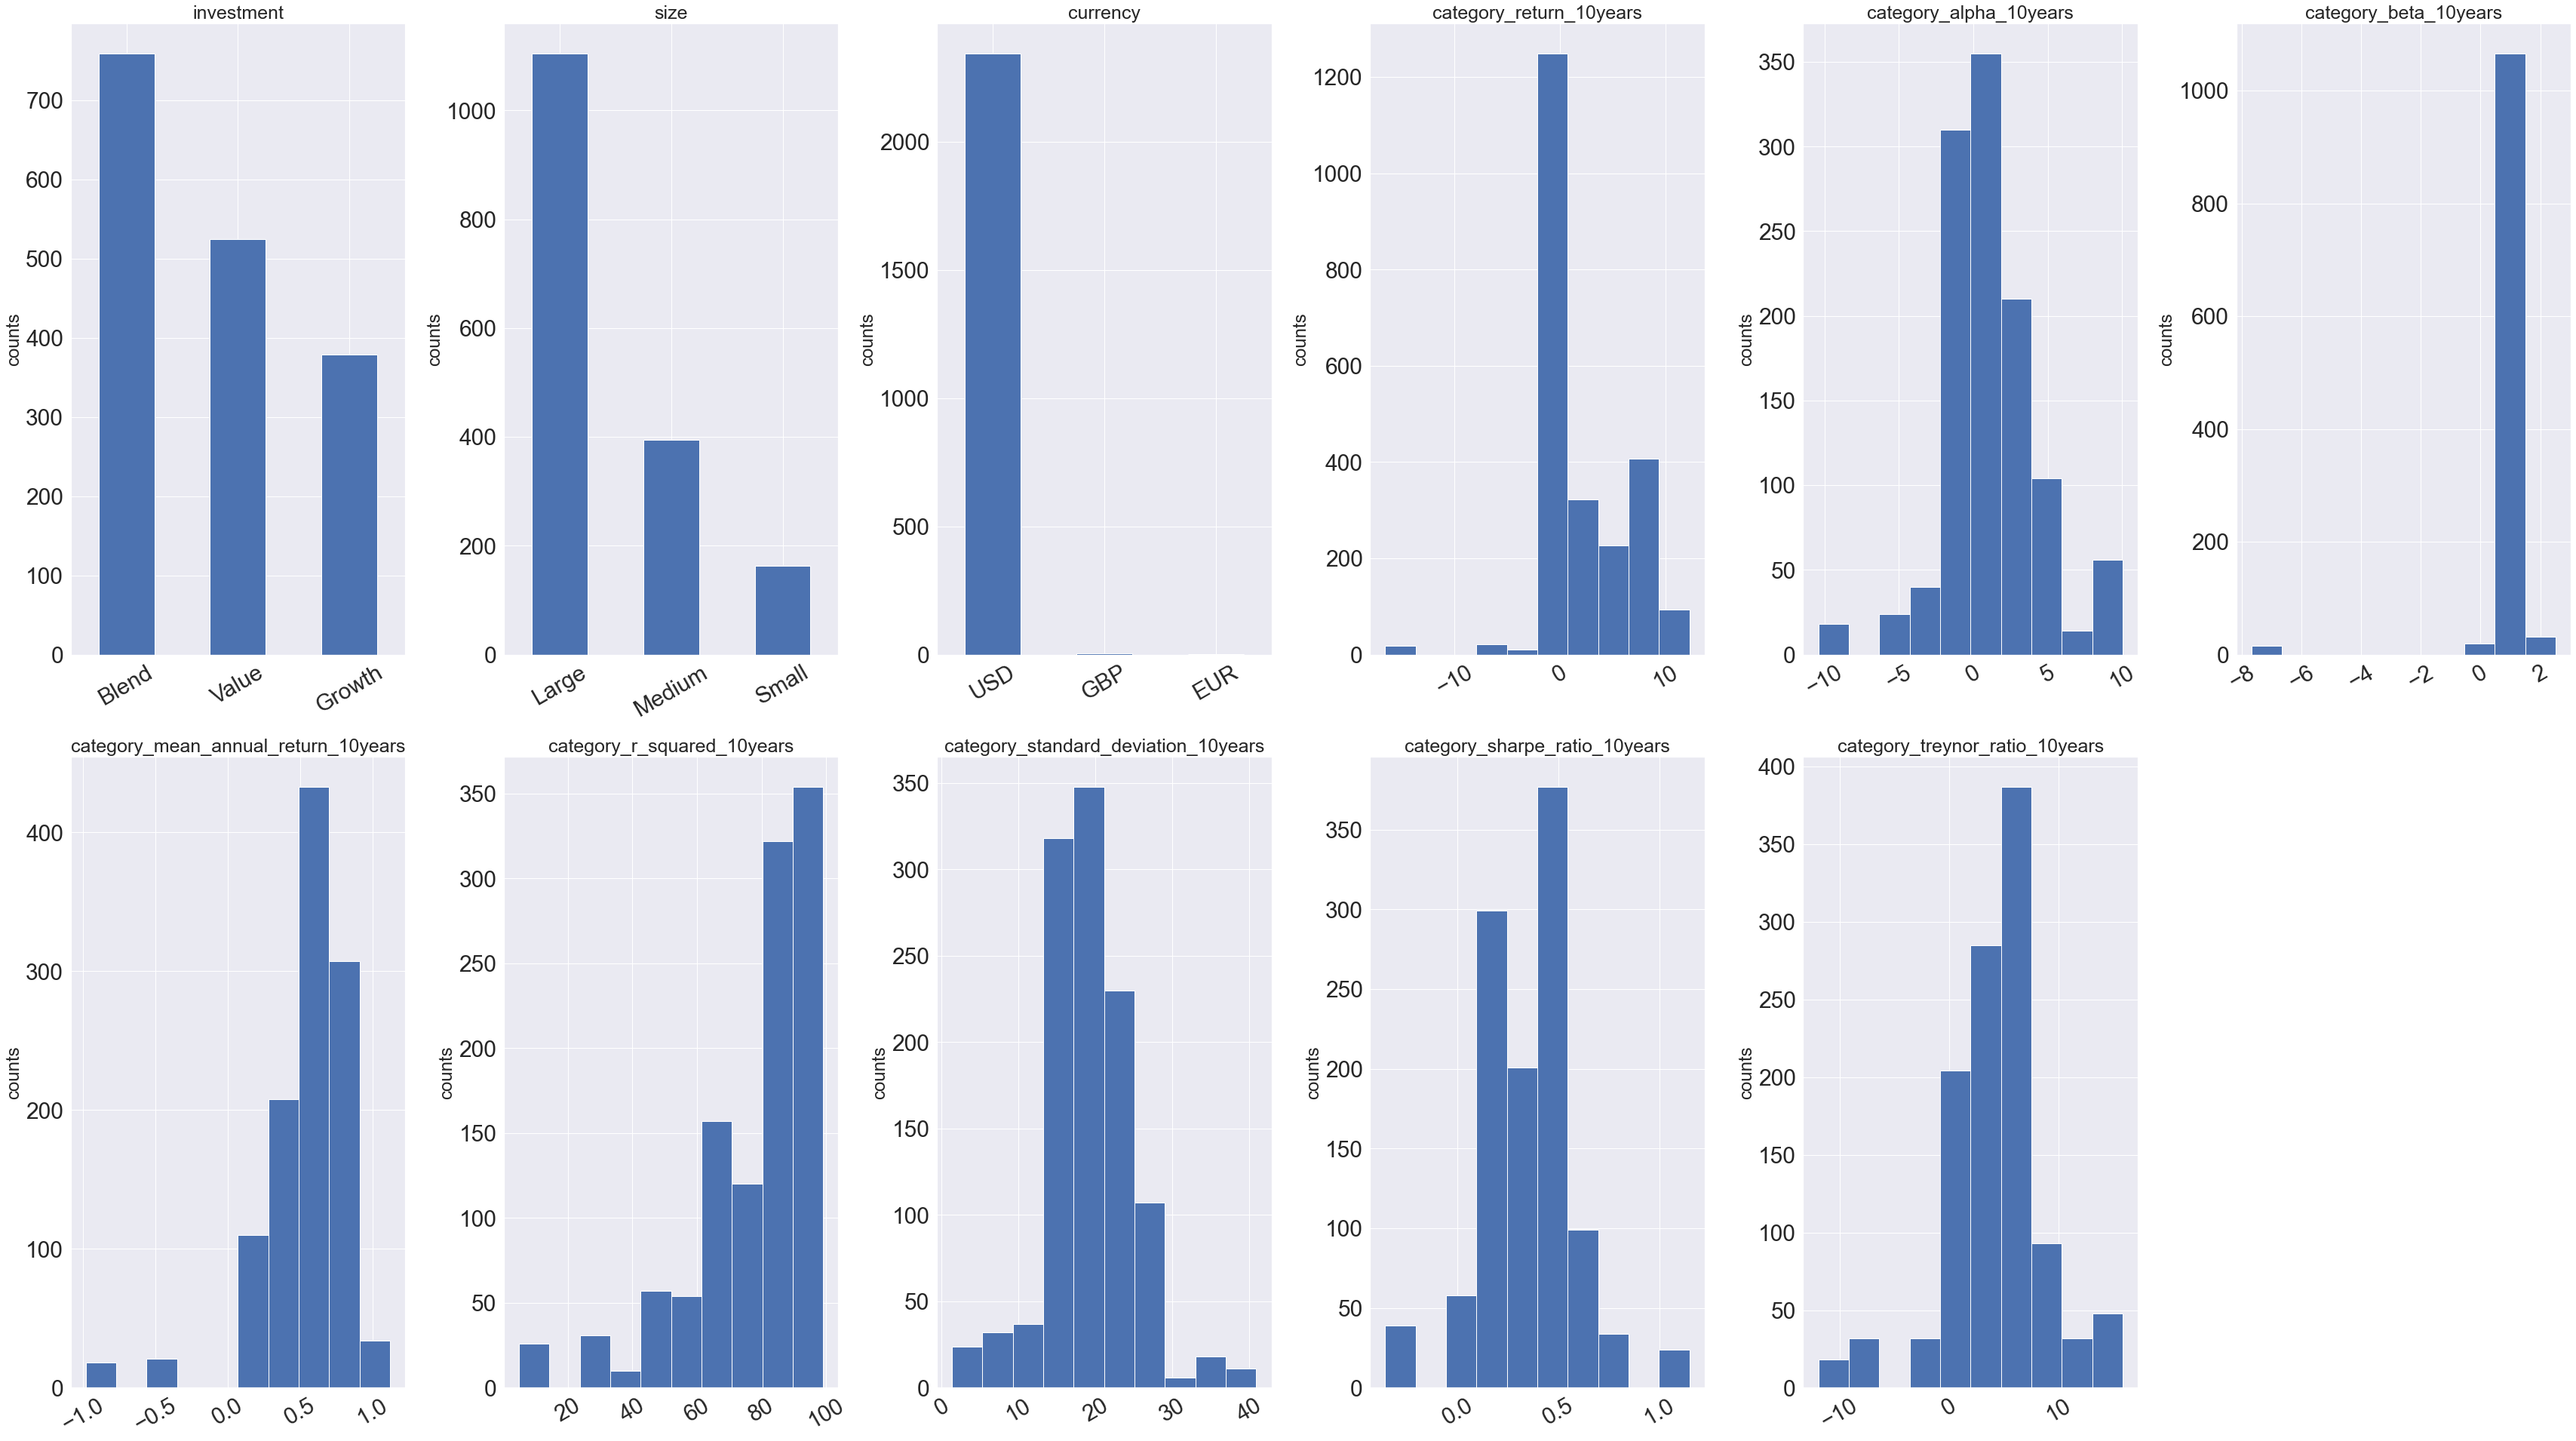

In [322]:
hist_bar_plot(df_etf)

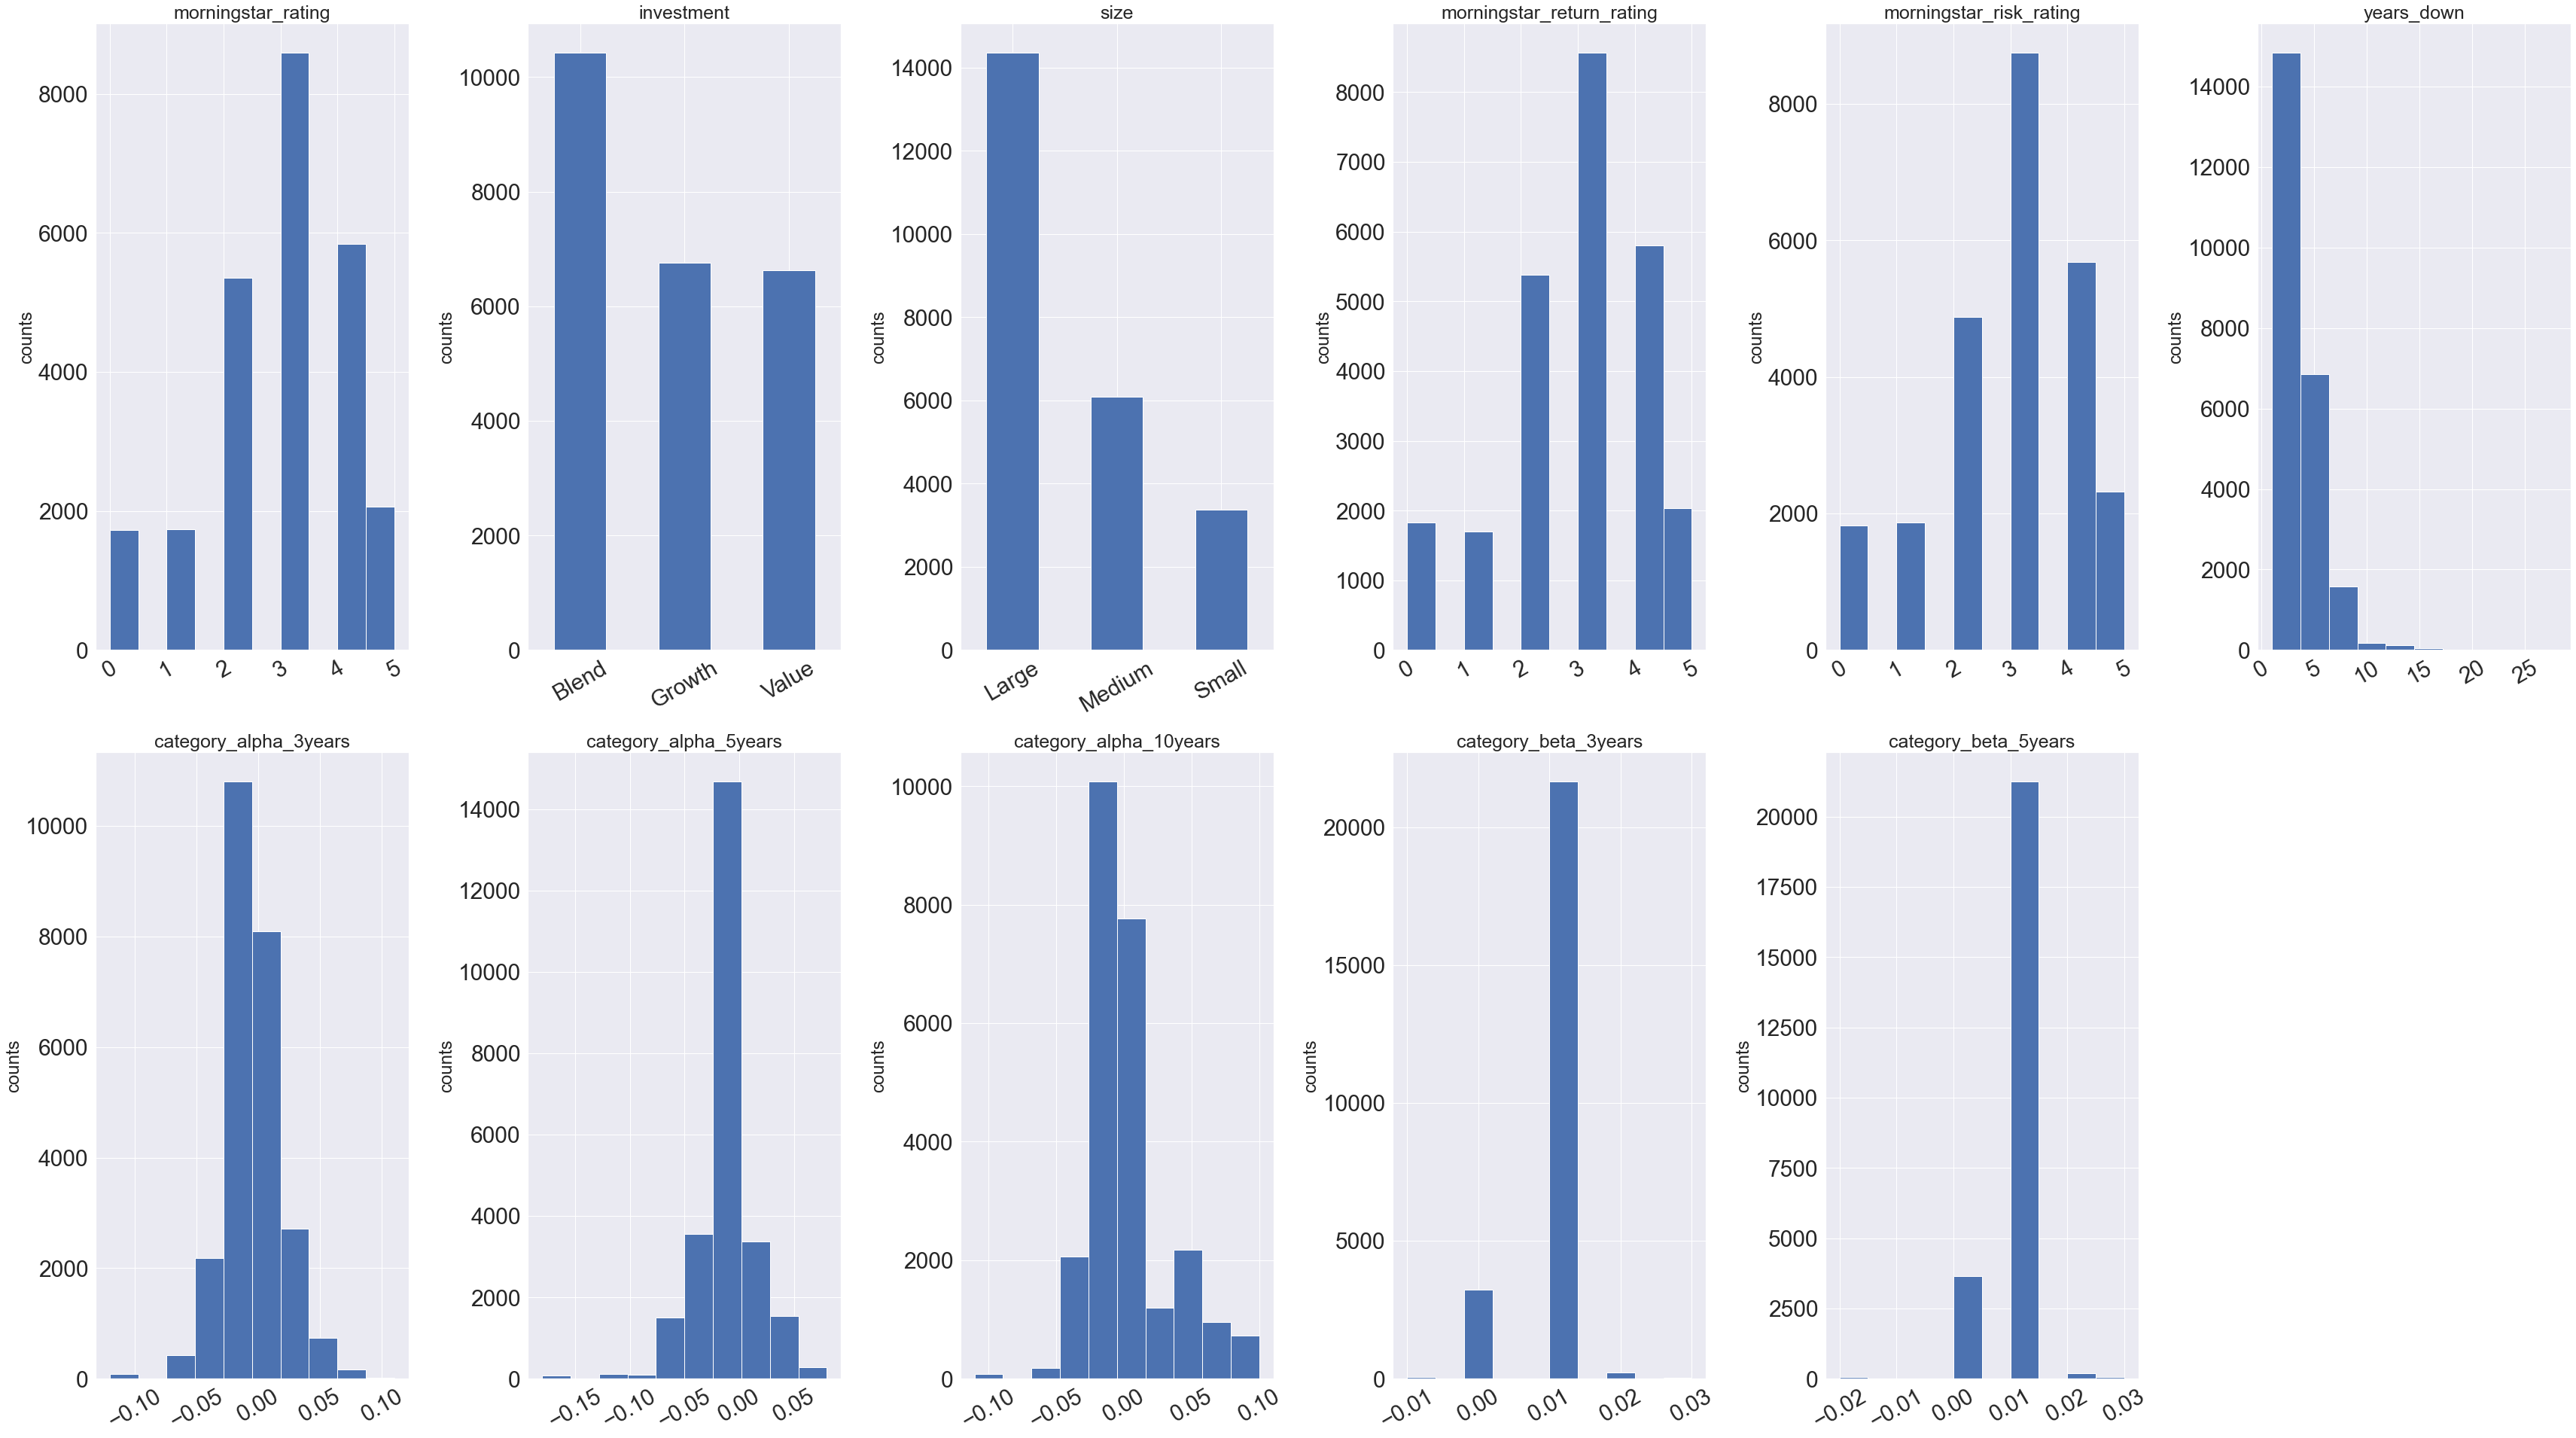

In [323]:
hist_bar_plot(df_mf)

In [324]:
def correlation_clean(df):
    """
    This dataset cleaning type reduces the number of 
    columns (attributes) that will be used in future
    analysis or model training. Reduction works by 
    focusing only on columns that have a greater 
    correlation (positive or negative) with other 
    columns. Having this, only high important attributes 
    are left to be utilized. 

    One of the reasons is that in large dimension datasets, 
    it takes too much time to train a model, and doesn't 
    guarantee that the model will have high accuracy. Also, 
    visualization in slow and through to understand in high 
    dimension datasets.
    
    Arguments:
        df: Dataset pandas DataFrame.
        threshold:  Threshold for choosing columns based 
        on correlation score.
    
    Returns:
        Cleaned dataset with high-correlated columns.
    """
    # Fix for non-numerical (or too many nan) columns
    col_corr = {
        # ETFs
        'fund_name', 'fund_extended_name', 'category', 'fund_family', 'net_assets', 'legal_type', 'investment', 'size',
        'currency', 'rating_us_government', 'fund_treynor_ratio_3years', 'category_treynor_ratio_5years',
    }
    try:
        for col in col_corr:
            del df[col]
    except KeyError:
        pass  # legal_type

    # Chose numerical columns
    corr_matrix = df.corr()
    #print(len(corr_matrix.columns))
    threshold=(-0.9, -0.3, 0.3, 0.9)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (not threshold[0] <= corr_matrix.iloc[i, j] <= threshold[1] and
                not threshold[2] <= corr_matrix.iloc[i, j] <= threshold[3]
            ) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]

    return df

In [325]:
df_etf = correlation_clean(df_etf)
df_etf

ytd_return  portfolio_stocks  price_earnings  price_book  price_sales  \
0            NaN            100.00           12.92        1.18         0.81   
1            NaN             99.99           12.92        1.18         0.81   
2            NaN             99.08           12.92        1.18         0.81   
3            NaN             18.57           12.09        1.01         0.56   
4            NaN            100.00           11.34        1.12         1.07   
...          ...               ...             ...         ...          ...   
2347      -33.01             20.01            0.00        0.00         0.00   
2348       25.94              0.00            0.00        0.00         0.00   
2349       18.43             99.69           12.73        1.36         0.66   
2350        3.21              0.00            0.00        0.00         0.00   
2351        6.81              0.00            0.00        0.00         0.00   

      price_cashflow  technology  fund_return_3years  \
0               5.41       14.61                3.83   
1               5.41       14.62                3.88   
2               5.44       14.62                3.85   
3               3.86        4.53               -5.38   
4               4.06       19.06                0.95   
...              ...         ...                 ...   
2347            0.00        0.00              -43.19   
2348            0.00        0.00               22.21   
2349            6.29        0.00                5.63   
2350            0.00        0.00                1.47   
2351            0.00        0.00               -7.40   

      category_mean_annual_return_5years  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  
...                                  ...  
2347                                 NaN  
2348                                 NaN  
2349                                0.30  
2350                                0.48  
2351                                 NaN  

[2352 rows x 9 columns]

In [326]:
df_mf = correlation_clean(df_etf)
df_mf

ytd_return  portfolio_stocks  price_earnings  price_book  price_sales  \
0            NaN            100.00           12.92        1.18         0.81   
1            NaN             99.99           12.92        1.18         0.81   
2            NaN             99.08           12.92        1.18         0.81   
3            NaN             18.57           12.09        1.01         0.56   
4            NaN            100.00           11.34        1.12         1.07   
...          ...               ...             ...         ...          ...   
2347      -33.01             20.01            0.00        0.00         0.00   
2348       25.94              0.00            0.00        0.00         0.00   
2349       18.43             99.69           12.73        1.36         0.66   
2350        3.21              0.00            0.00        0.00         0.00   
2351        6.81              0.00            0.00        0.00         0.00   

      price_cashflow  technology  fund_return_3years  \
0               5.41       14.61                3.83   
1               5.41       14.62                3.88   
2               5.44       14.62                3.85   
3               3.86        4.53               -5.38   
4               4.06       19.06                0.95   
...              ...         ...                 ...   
2347            0.00        0.00              -43.19   
2348            0.00        0.00               22.21   
2349            6.29        0.00                5.63   
2350            0.00        0.00                1.47   
2351            0.00        0.00               -7.40   

      category_mean_annual_return_5years  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  
...                                  ...  
2347                                 NaN  
2348                                 NaN  
2349                                0.30  
2350                                0.48  
2351                                 NaN  

[2352 rows x 9 columns]

In [327]:
def corr_mtx(df, fig_size=50, unique=True):
    """
    Correlation measures both the strength and direction of 
    the linear relationship between two variables. Depending 
    on the data, correlations could be calculated in a 
    couple of different ways. The most used way is to use 
    the Pearson product-moment correlation coefficient.
    
    Arguments:
        df: Dataset pandas DataFrame.
        fig_size: Size of the plot.
        unique: If True, it reduces the number of 
        attributes that will be visualized using 
        the number of unique values as a heuristic.
    """
    sns.set(font_scale=4.0)
    # Chose adequate columns for visualization
    print(unique)
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if num_unique_col[col] > 1]]

    f, ax = plt.subplots(figsize=(fig_size, fig_size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
    sns.set(font_scale=2.0)

False


C:\Users\naren\AppData\Local\Temp\ipykernel_15080\2441428.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


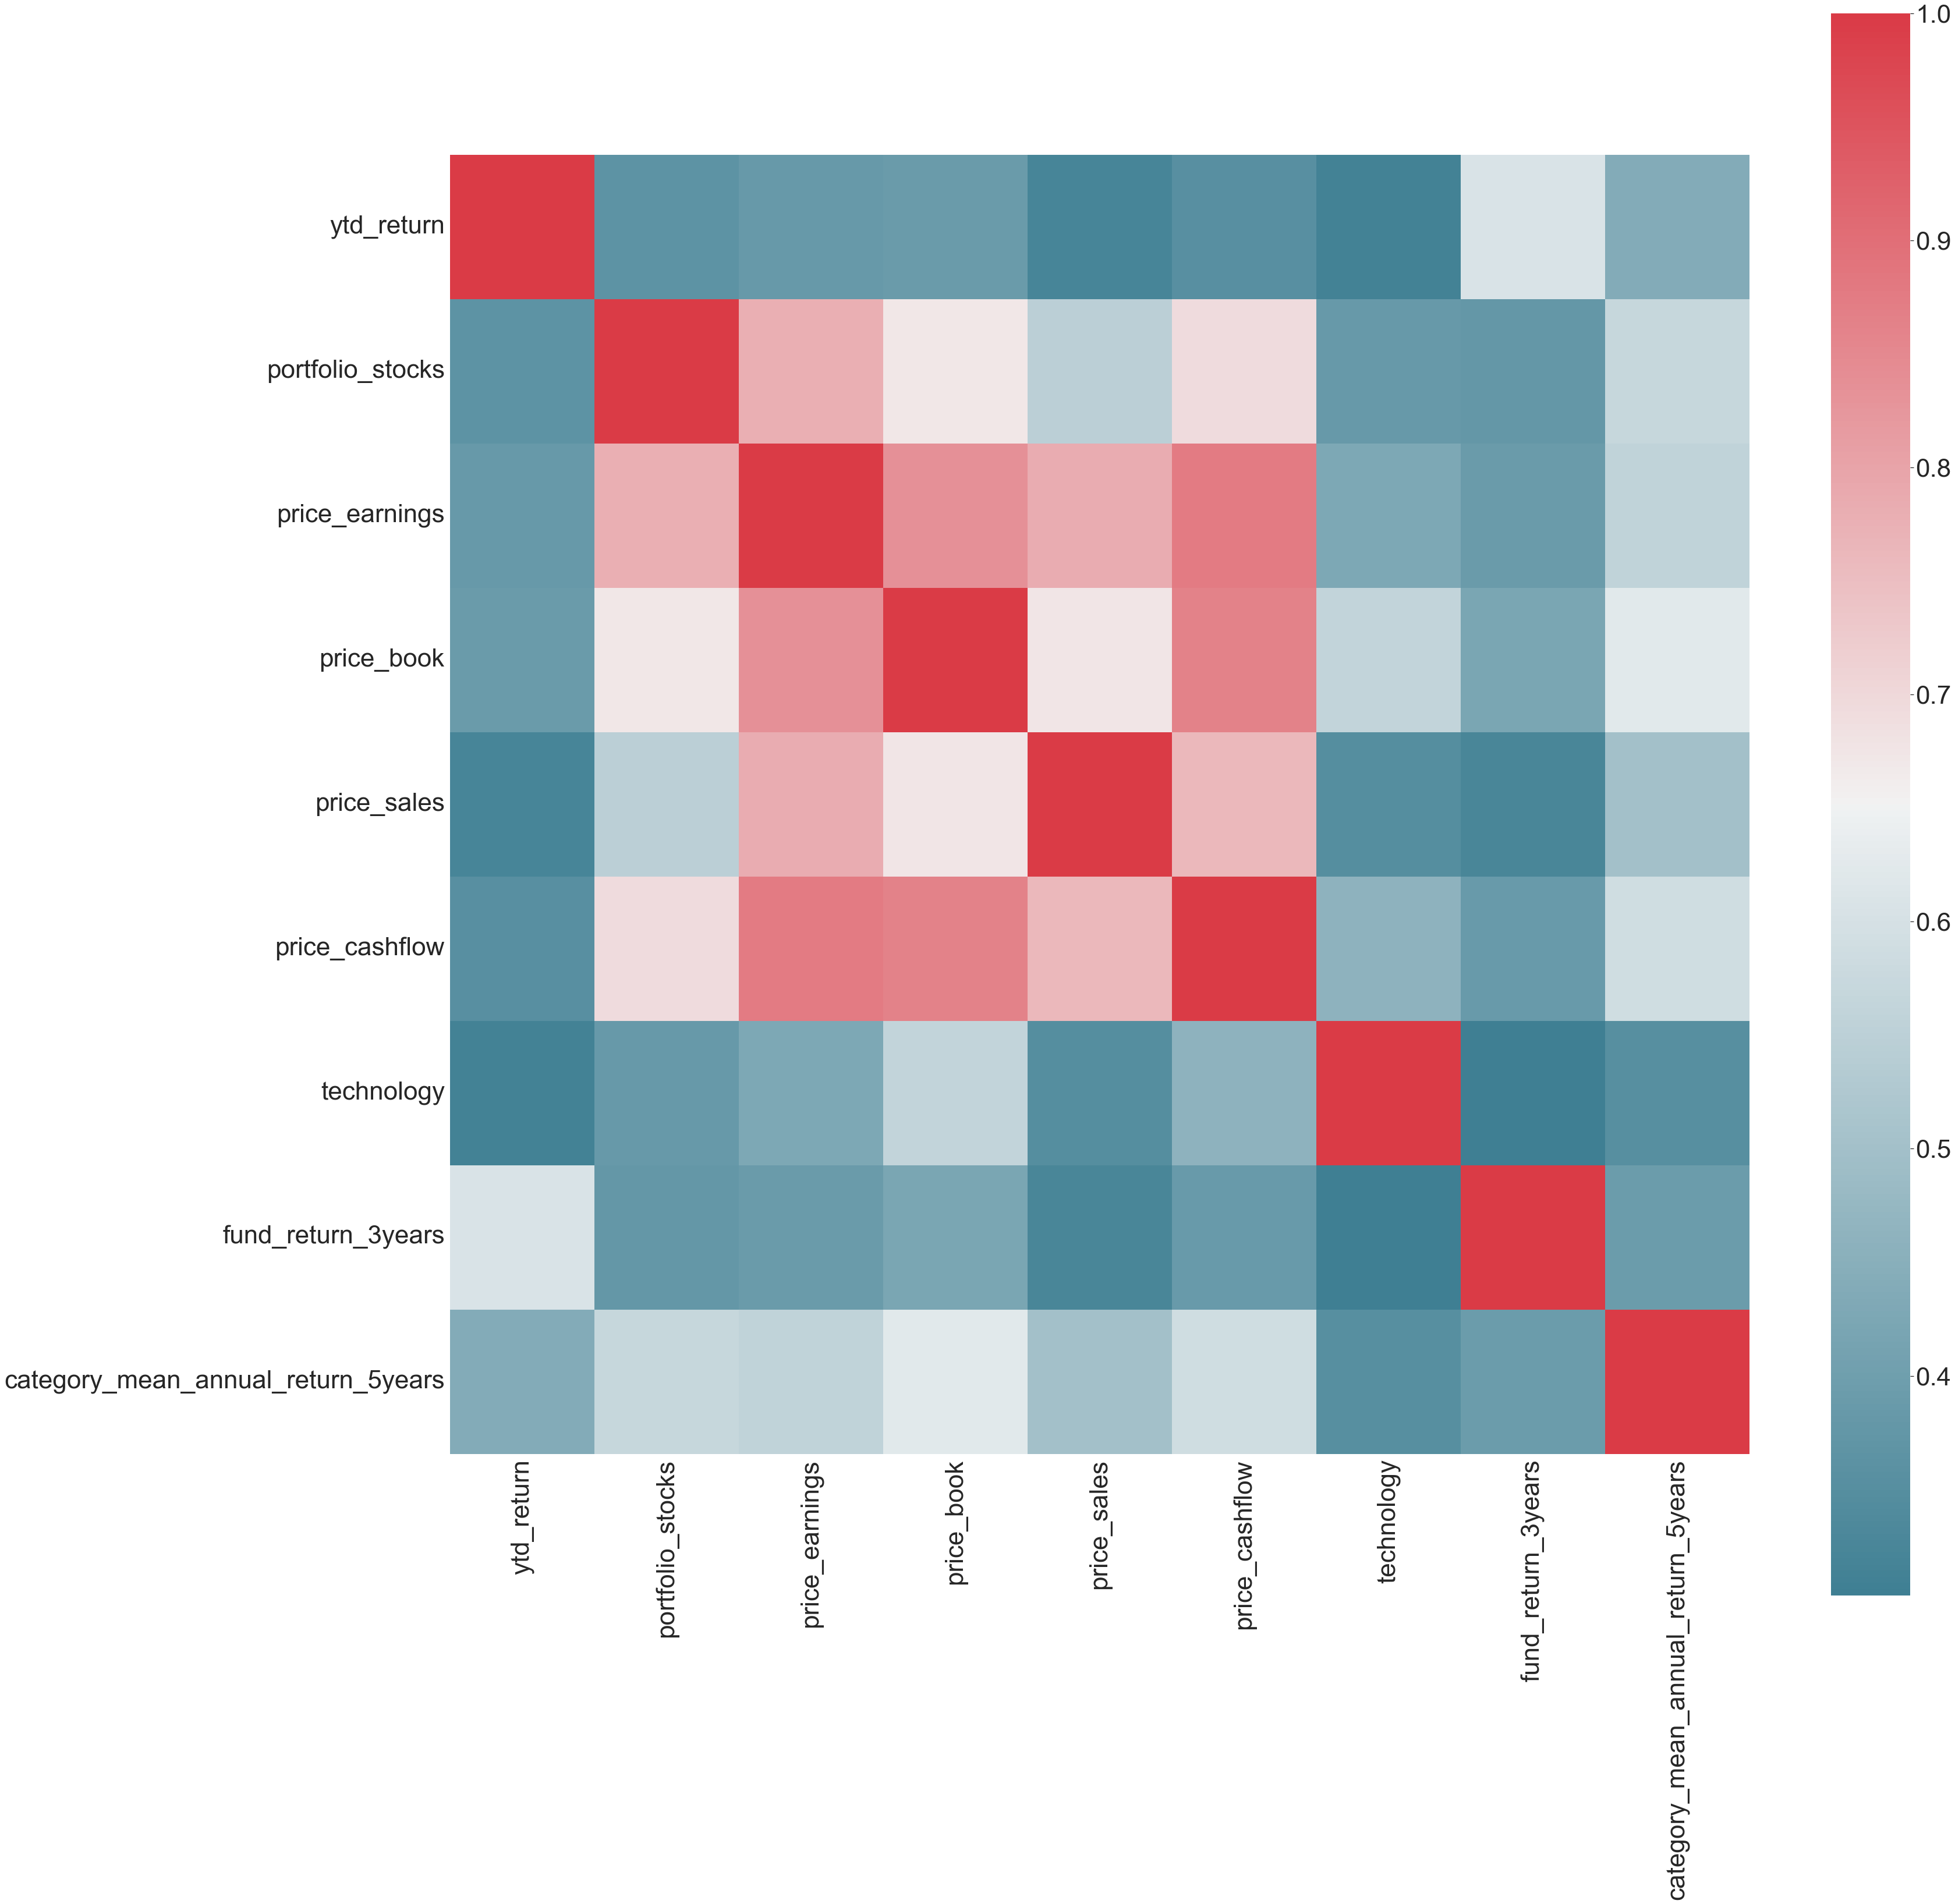

In [328]:
corr_mtx(df_etf, unique=False)

False


C:\Users\naren\AppData\Local\Temp\ipykernel_15080\2441428.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


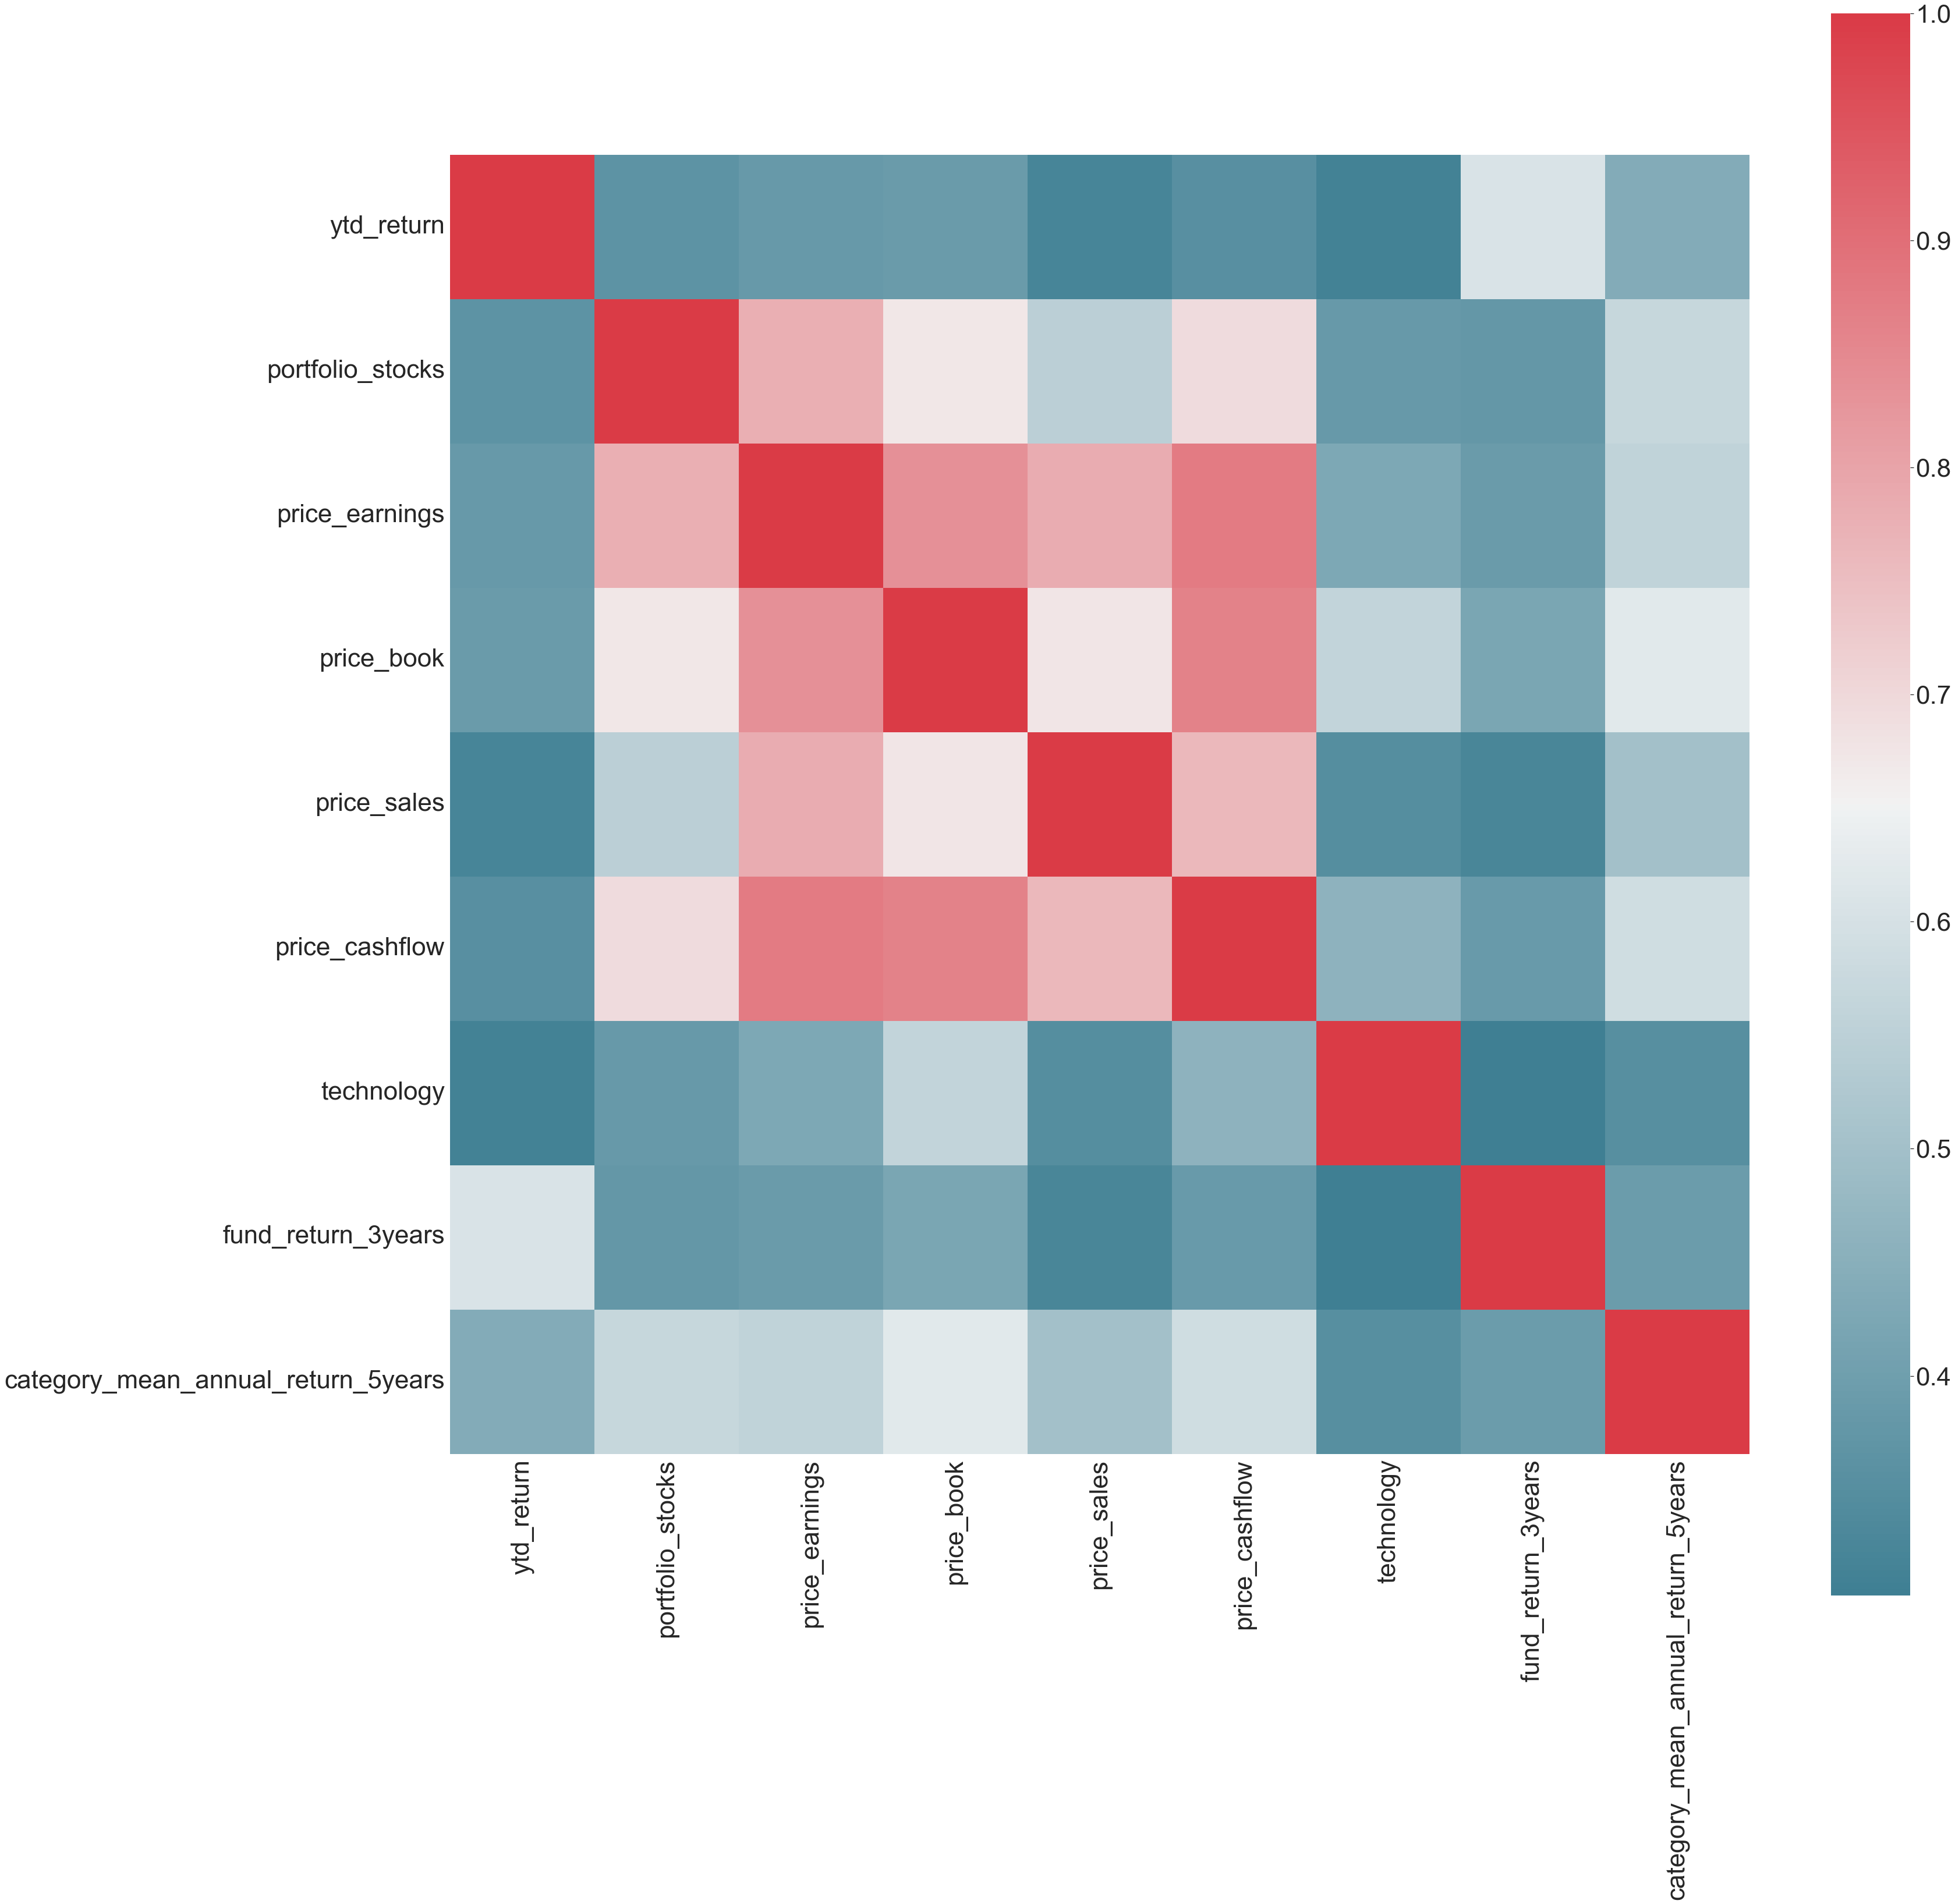

In [329]:
corr_mtx(df_mf, unique=False)

In [330]:
def scatter_mtx(df, fig_size=50, cap=10):
    """
    Creates a grid of Axes such that each numeric 
    variable in data will be shared in the y-axis 
    across a single row and in the x-axis across 
    a single column. The diagonal Axes are treated 
    differently, drawing a plot to show the univariate 
    distribution of the data for the variable in 
    that column.
    
    Arguments:
        df: Dataset pandas DataFrame.
        fig_size: Size of the plot.
        cap: Max plots to be plot.
    """
    df = df.select_dtypes(np.number)
    if len(list(df)) > cap:
        df = df[list(df)[:cap]]
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(fig_size, fig_size), diagonal='kde')
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=30, rotation=90)
        ax.set_ylabel(ax.get_ylabel(), fontsize=30, rotation=0)
    plt.show()

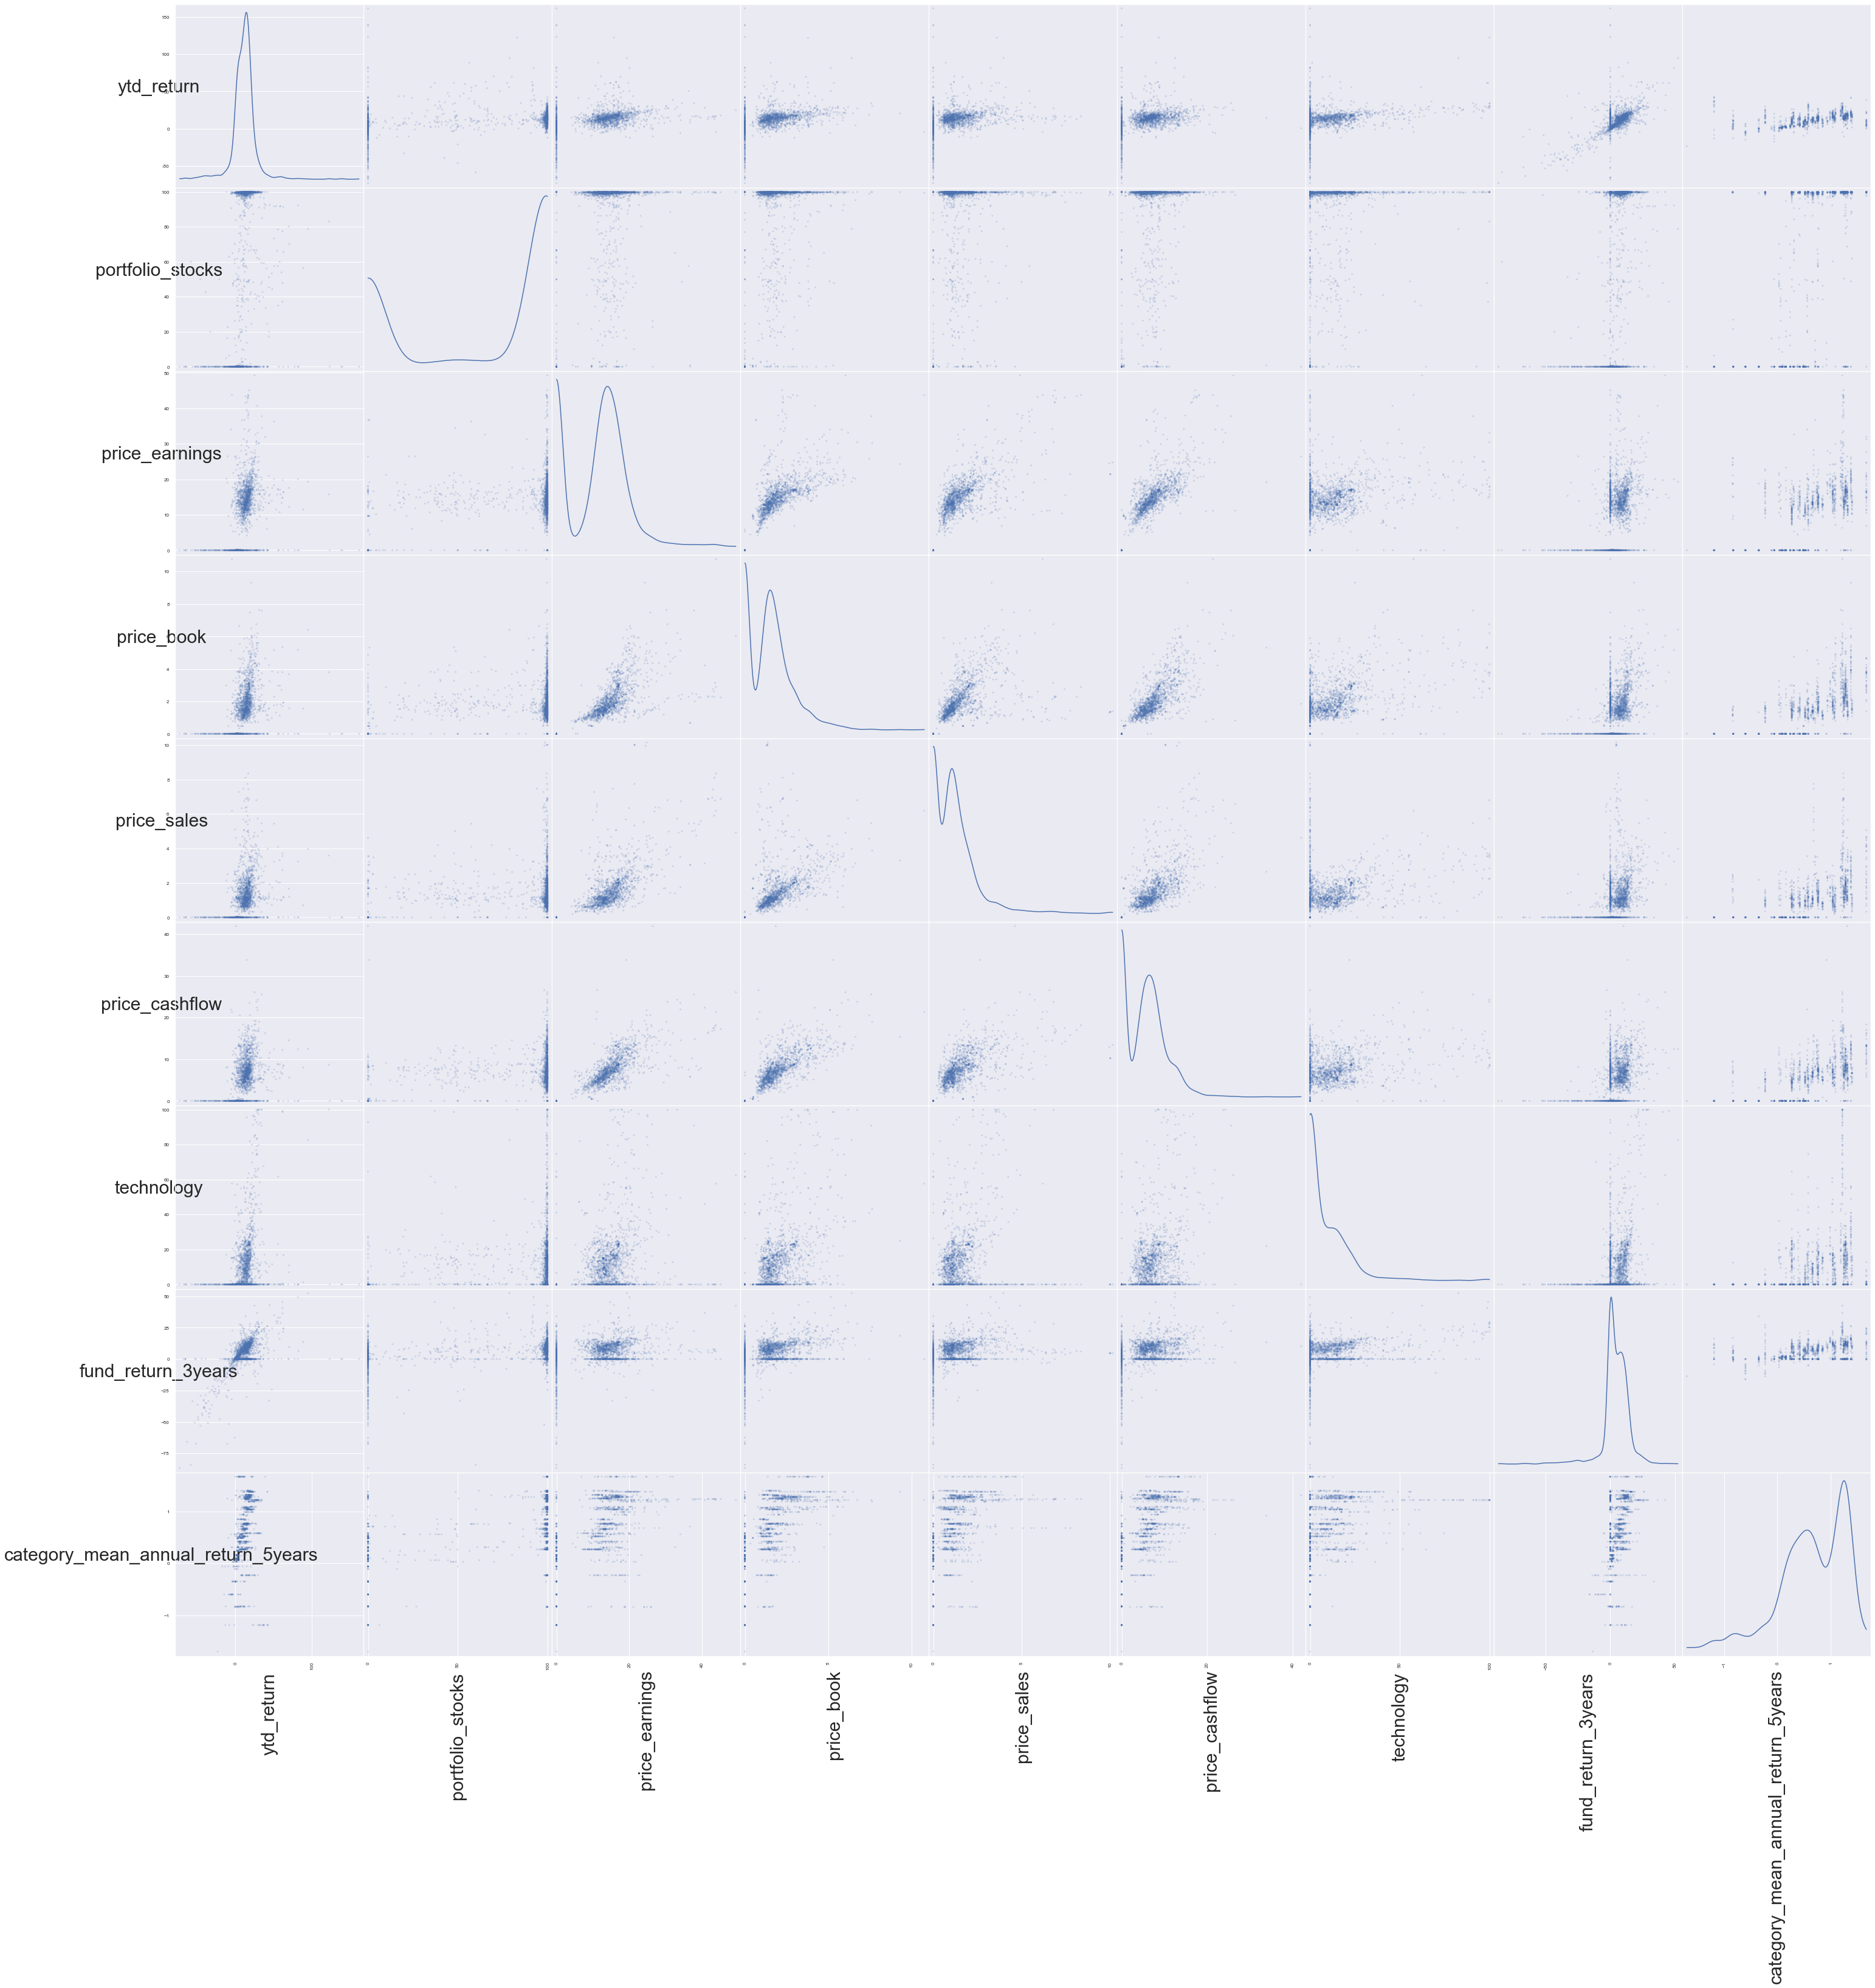

In [331]:
scatter_mtx(df_etf, cap=20)

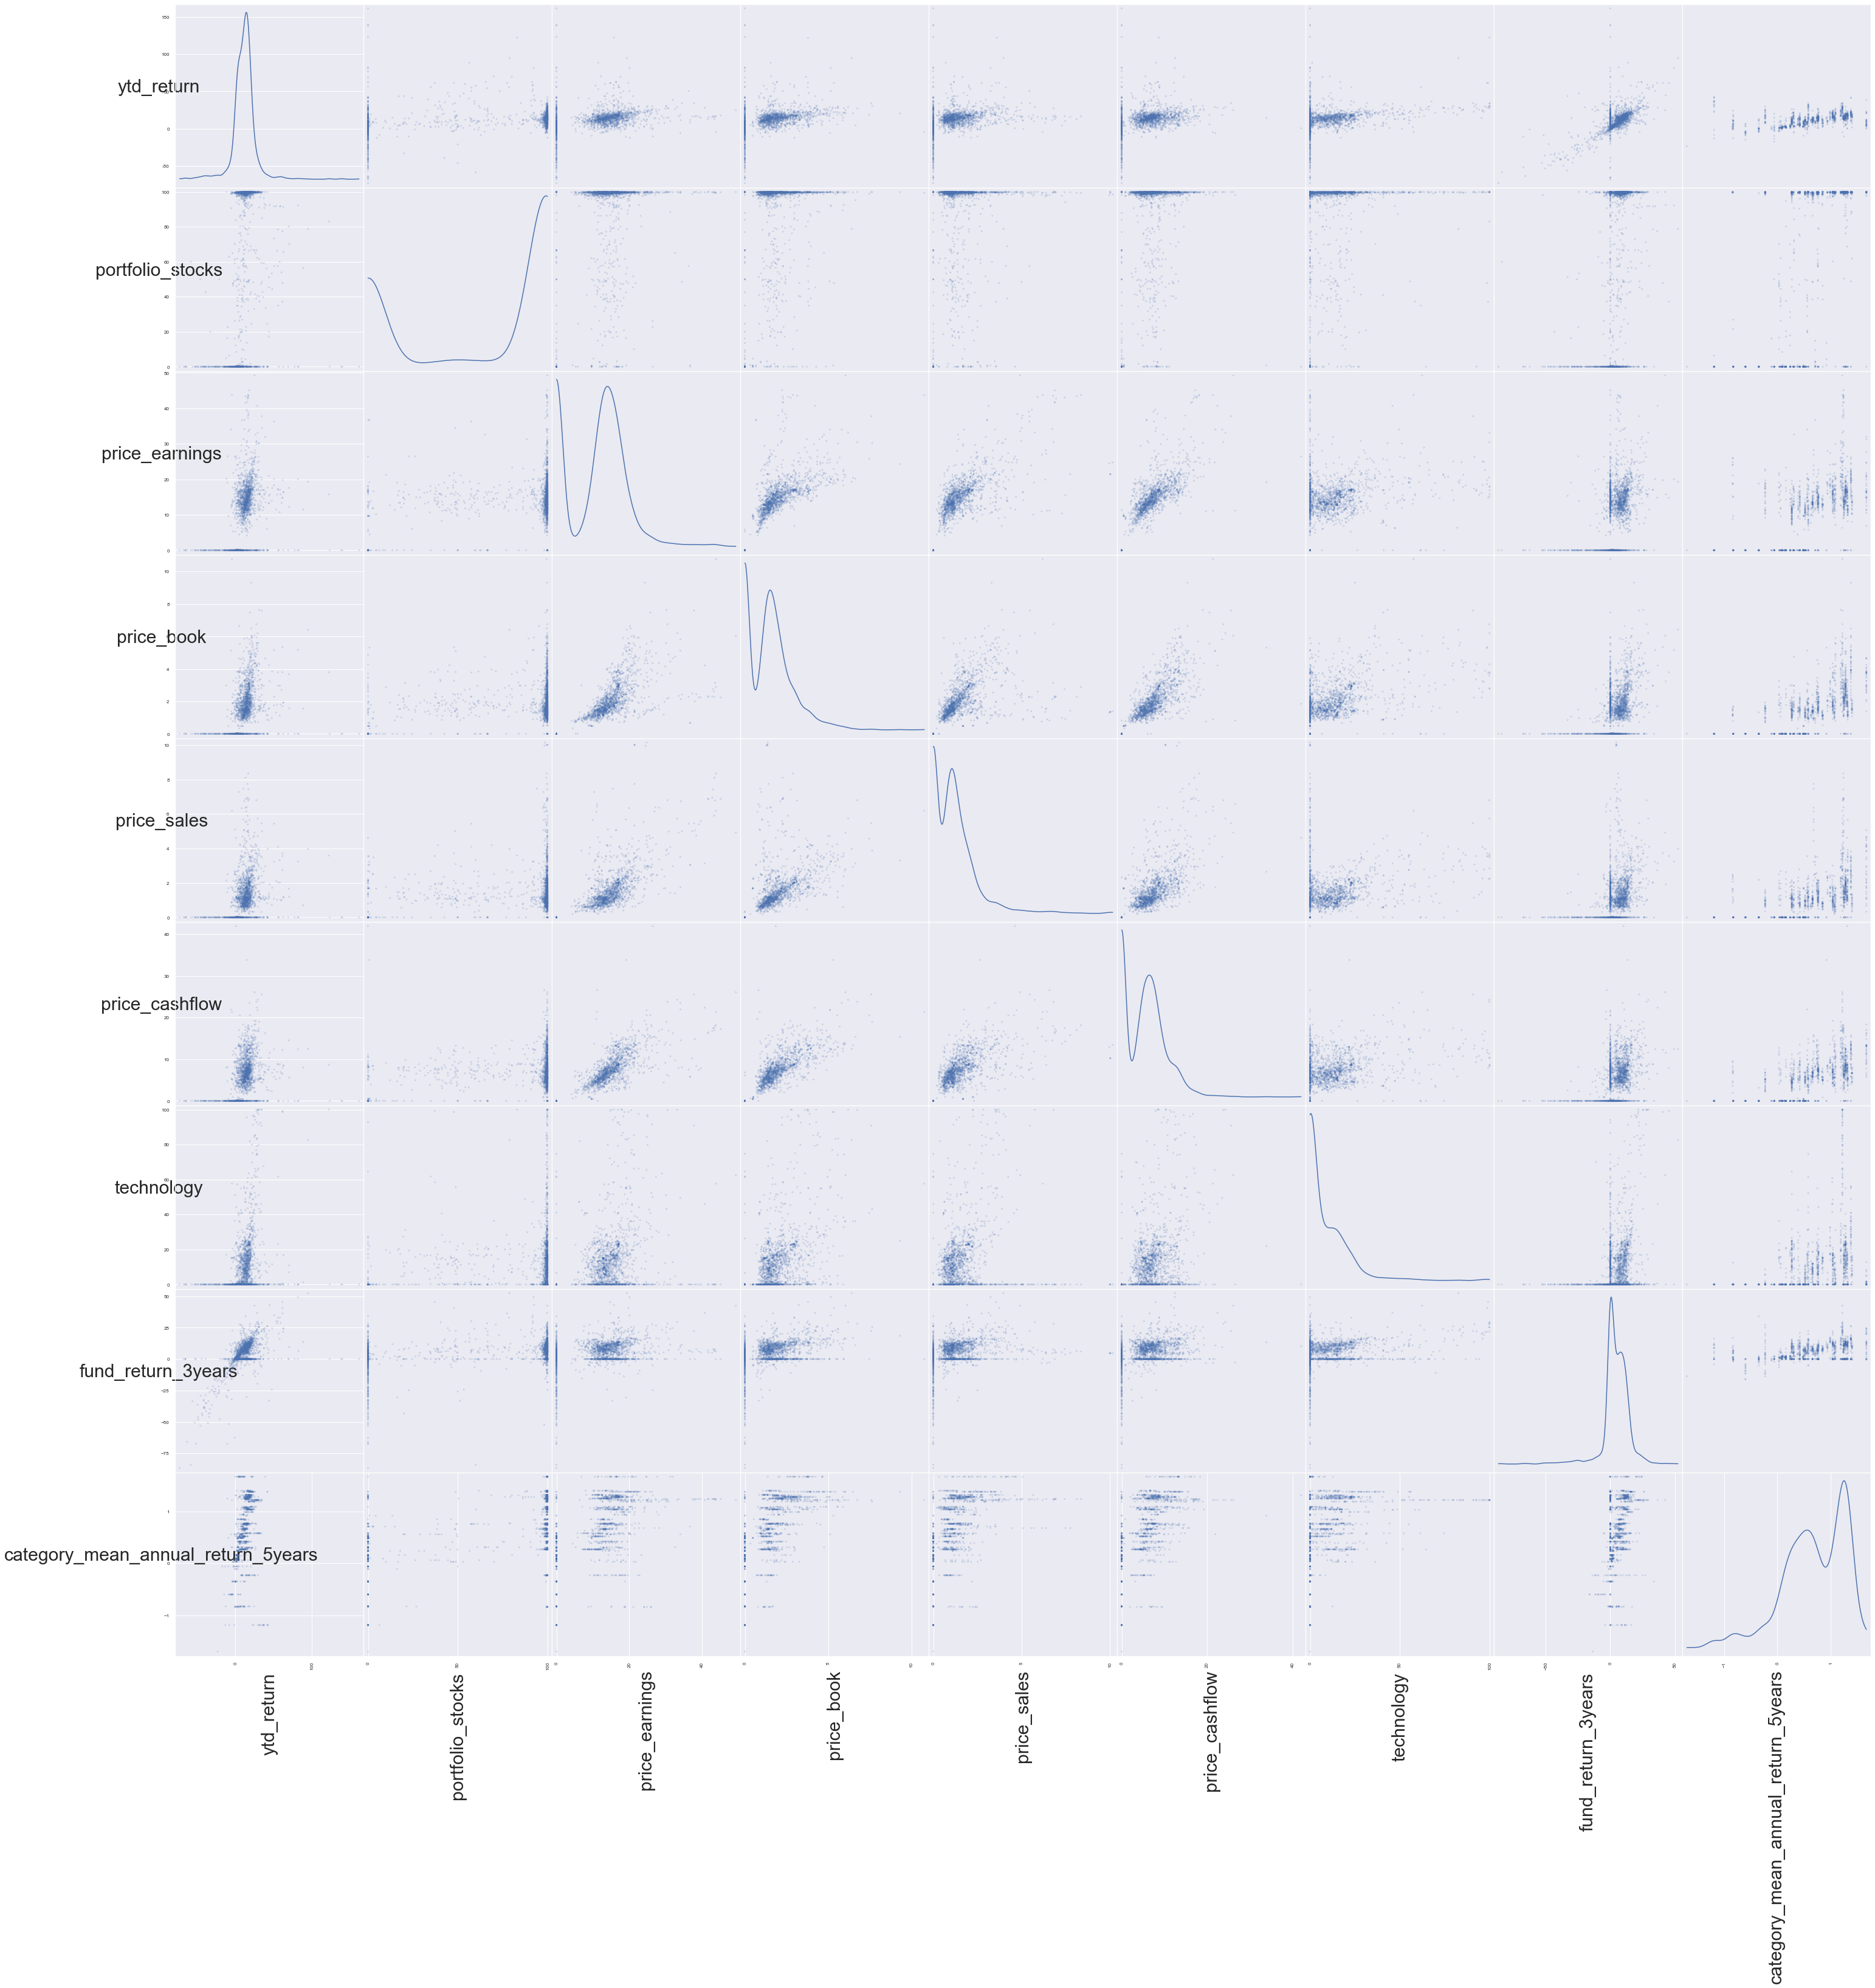

In [332]:
scatter_mtx(df_mf, cap=20)

In [333]:
    etf_df = pd.read_csv('ETFs.csv', index_col=False)
    mutual_df = pd.read_csv('Mutual Funds.csv', index_col=False)

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\1047375404.py:2: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  mutual_df = pd.read_csv('Mutual Funds.csv', index_col=False)


In [334]:
    """
    Prepares a dataset for the training and inference 
    phase. The cleaning phase consists of:
    - Replacing all different NaN values with single 
    consistent NaN indicator
    - Removing columns with low-value information (ones 
    that have many unique values i.e. fund name)
    - Separation of categorical and numerical  attributes
    - Preparing categorical columns:
      - Populate NaN values
      - Label encode columns
      - One-hot encode columns
    - Preparing numerical columns:
      - Determine quantile and standard deviation of 
      each column
      - Populate NaN values using the Normal (Gaussian) 
      distribution
    
    Arguments:
        df: Dataset pandas DataFrame.
        dataset_type: etf or mf.
        
    Returns:
        Cleaned dataset.
    """
    # Fix NaN
    etf_df.replace('', 'NaN', inplace=True)
    etf_df.replace('nan', 'NaN', inplace=True)
    etf_df.replace('NaN', np.nan, inplace=True)

    # As consequence of too many NaN values
    migrate_columns = [
        'fund_treynor_ratio_3years',
        'category_treynor_ratio_5years',
    ]

    # Join together numerical columns
    num_mean = etf_df.select_dtypes(np.number)
    for col in migrate_columns:
        num_mean = num_mean.join(pd.to_numeric(etf_df[col], errors="coerce"))

    # Columns with low-value information (ignored during initial analysis)
    low_info_categorical_columns = [
        'category',
        'currency',
        'fund_extended_name',
        'fund_family',
        'fund_name',
        'legal_type',
    ]
    

    # Join together categorical (without low-value) columns
    str_mean = etf_df[etf_df.columns.difference(num_mean.columns)]
    for col in low_info_categorical_columns:
        str_mean = str_mean.drop(col, axis=1)

    # Populate empty values in categorical columns
    for col in list(str_mean):
        unique = str_mean[col].unique()
        unique = [x for x in unique if str(x) != 'nan']
        for i, value in enumerate(str_mean[col]):
            if value is np.nan:
                choice = random.choice(unique)
                str_mean[col].iloc[i] = choice

    # Encode categorical columns
    le = LabelEncoder()
    for col in str_mean:
        etf_df[col] = le.fit_transform(str_mean[col])

    # One-hot encode categorical columns
    ohe = OneHotEncoder()
    for col in str_mean:
        unique = str_mean[col].unique()
        unique = [col + "_" + x for x in unique if str(x) != 'nan']
        enc_df = pd.DataFrame(ohe.fit_transform(etf_df[[col]]).toarray(), columns=unique)
        etf_df = etf_df.drop(col, axis=1)
        etf_df = etf_df.join(enc_df)

    # Populate numerical columns
    mu = num_mean.quantile(0)
    sigma = num_mean.std(axis=0)
    for col in num_mean:
        stack = num_mean[col]
        null_stack = stack[pd.isnull(stack)]
        ran = np.random.normal(mu[col], sigma[col], len(null_stack))
        stack.loc[null_stack.index] = ran
        etf_df[col] = stack.values

    # Clean
    for col in low_info_categorical_columns:
        etf_df = etf_df.drop(col, axis=1)

etf_df

net_assets  ytd_return  fund_yield  net_annual_expense_ratio_fund  \
0     4.010000e+12  -87.721986        1.84                           0.00   
1     8.430000e+12  -72.204471        1.77                           0.05   
2     3.730000e+12  -84.490405        1.84                           0.00   
3     4.450000e+09  -52.071080        0.00                           0.00   
4     1.920000e+09  -52.218299        2.57                           0.00   
...            ...         ...         ...                            ...   
2347  4.630000e+06  -33.010000        0.14                           0.95   
2348  9.908000e+07   25.940000        0.00                           1.35   
2349  5.092000e+07   18.430000       11.78                           0.65   
2350  1.997400e+08    3.210000        2.74                           0.15   
2351  1.634000e+07    6.810000        0.00                           1.62   

      net_annual_expense_ratio_category  portfolio_stocks  portfolio_bonds  \
0                              0.099022            100.00             0.00   
1                              0.576226             99.99             0.00   
2                              0.063463             99.08             0.00   
3                              0.123014             18.57             0.00   
4                              0.296751            100.00             0.00   
...                                 ...               ...              ...   
2347                           0.920000             20.01             0.00   
2348                           1.120000              0.00             0.00   
2349                           0.740000             99.69             0.00   
2350                           0.140000              0.00            99.41   
2351                           0.850000              0.00             0.00   

      price_earnings  price_book  price_sales  ...  fund_treynor_ratio_5years  \
0              12.92        1.18         0.81  ...                       8.01   
1              12.92        1.18         0.81  ...                       8.03   
2              12.92        1.18         0.81  ...                       8.03   
3              12.09        1.01         0.56  ...                       6.32   
4              11.34        1.12         1.07  ...                       4.08   
...              ...         ...          ...  ...                        ...   
2347            0.00        0.00         0.00  ...                       0.00   
2348            0.00        0.00         0.00  ...                     -30.81   
2349           12.73        1.36         0.66  ...                      -8.02   
2350            0.00        0.00         0.00  ...                       1.36   
2351            0.00        0.00         0.00  ...                      -3.71   

      category_treynor_ratio_5years  fund_treynor_ratio_10years  \
0                        -31.577334                        9.29   
1                        -19.566003                        9.33   
2                        -29.353593                        9.31   
3                        -12.281348                        4.29   
4                        -33.228358                        6.18   
...                             ...                         ...   
2347                     -17.328532                        0.00   
2348                     -16.072566                        0.00   
2349                       1.890000                        0.00   
2350                       1.530000                        0.00   
2351                     -38.781783                      -16.75   

      category_treynor_ratio_10years  investment_Blend  investment_Value  \
0                         -12.302868               1.0               0.0   
1                          -6.955224               1.0               0.0   
2                         -10.921751               1.0               0.0   
3                         -10.456767               0.0          

In [335]:
    # Fix NaN
    mutual_df.replace('', 'NaN', inplace=True)
    mutual_df.replace('nan', 'NaN', inplace=True)
    mutual_df.replace('NaN', np.nan, inplace=True)

    # As consequence of too many NaN values
    migrate_columns = [
        'fund_treynor_ratio_3years',
        'price_cashflow',
            'price_sales',
            'price_earnings',
            'median_market_cap',
            'fund_treynor_ratio_5years',
            'fund_treynor_ratio_10years',
    ]


    # Join together numerical columns
    num_mean = mutual_df.select_dtypes(np.number)
    for col in migrate_columns:
        num_mean = num_mean.join(pd.to_numeric(mutual_df[col], errors="coerce"))

    # Columns with low-value information (ignored during initial analysis)
    low_info_categorical_columns = [
        'category',
        'currency',
        'fund_extended_name',
        'fund_family',
        'fund_name',
        'inception_date',
    ]


    # Join together categorical (without low-value) columns
    str_mean = mutual_df[mutual_df.columns.difference(num_mean.columns)]
    for col in low_info_categorical_columns:
        str_mean = str_mean.drop(col, axis=1)

    # Populate empty values in categorical columns
    for col in list(str_mean):
        unique = str_mean[col].unique()
        unique = [x for x in unique if str(x) != 'nan']
        for i, value in enumerate(str_mean[col]):
            if value is np.nan:
                choice = random.choice(unique)
                str_mean[col].iloc[i] = choice

    # Encode categorical columns
    le = LabelEncoder()
    for col in str_mean:
        mutual_df[col] = le.fit_transform(str_mean[col])

    # One-hot encode categorical columns
    ohe = OneHotEncoder()
    for col in str_mean:
        unique = str_mean[col].unique()
        unique = [col + "_" + x for x in unique if str(x) != 'nan']
        enc_df = pd.DataFrame(ohe.fit_transform(mutual_df[[col]]).toarray(), columns=unique)
        mutual_df = mutual_df.drop(col, axis=1)
        mutual_df = mutual_df.join(enc_df)

    # Populate numerical columns
    mu = num_mean.quantile(0)
    sigma = num_mean.std(axis=0)
    for col in num_mean:
        stack = num_mean[col]
        null_stack = stack[pd.isnull(stack)]
        ran = np.random.normal(mu[col], sigma[col], len(null_stack))
        stack.loc[null_stack.index] = ran
        mutual_df[col] = stack.values

    # Clean
    for col in low_info_categorical_columns:
        mutual_df = mutual_df.drop(col, axis=1)

mutual_df

C:\Users\naren\AppData\Local\Temp\ipykernel_15080\2075122206.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stack.loc[null_stack.index] = ran


net_assets  ytd_return  fund_yield  morningstar_rating  \
0      5.302800e+08       12.79        1.43                   3   
1      8.884000e+07        9.21        2.62                   2   
2      1.080000e+09       16.00        0.00                   3   
3      7.852700e+08       11.57        1.38                   4   
4      5.271300e+08       11.62        0.66                   4   
...             ...         ...         ...                 ...   
25303  1.244900e+08       11.18        0.00                   4   
25304  4.071000e+07       27.99        0.00                   5   
25305  4.071000e+07       27.93        0.00                   5   
25306  1.722000e+07       26.12        0.00                   5   
25307  1.722000e+07       26.27        0.00                   5   

       net_annual_expense_ratio_fund  net_annual_expense_ratio_category  \
0                               1.22                               1.01   
1                               1.43                               0.94   
2                               1.15                               1.06   
3                               0.91                               0.77   
4                               1.44                               1.38   
...                              ...                                ...   
25303                           1.14                               1.15   
25304                           1.10                               1.06   
25305                           1.40                               1.06   
25306                           1.30                               1.06   
25307                           1.00                               1.06   

       portfolio_cash  portfolio_stocks  portfolio_bonds  portfolio_others  \
0                3.80             76.25            15.35              4.60   
1                1.97             47.13            49.75              0.00   
2                1.91             97.06             0.00              1.03   
3                2.57             75.06            22.29              0.04   
4                4.27             95.71             0.00              0.01   
...               ...               ...              ...               ...   
25303            0.00             98.91             0.00              1.09   
25304            0.03             99.97             0.00              0.00   
25305            0.03             99.97             0.00              0.00   
25306            1.58             98.42             0.00              0.00   
25307            1.58             98.42             0.00              0.00   

       ...  fund_treynor_ratio_5years  category_treynor_ratio_5years  \
0      ...                   2.260000                           0.02   
1      ...                   6.910000                           0.08   
2      ...                  10.220000                           0.10   
3      ...                   4.140000                           0.03   
4      ...                   2.980000                           0.03   
...    ...                        ...                            ...   
25303  ...                   6.330000                           0.04   
25304  ...                -922.469118                           0.10   
25305  ...                -927.316902                           0.10   
25306  ...                -921.639676                           0.10   
25307  ...                -915.845519                           0.10   

       fund_treynor_ratio_10years  category_treynor_ratio_10years  \
0                        6.710000                            0.07   
1                       12.770000                            0.14   
2                       13.440000                            0.15   
3                        8.240000                            0.08   
4                    -1011.062468                            0.09   
...                           ...                             ...   
25303             

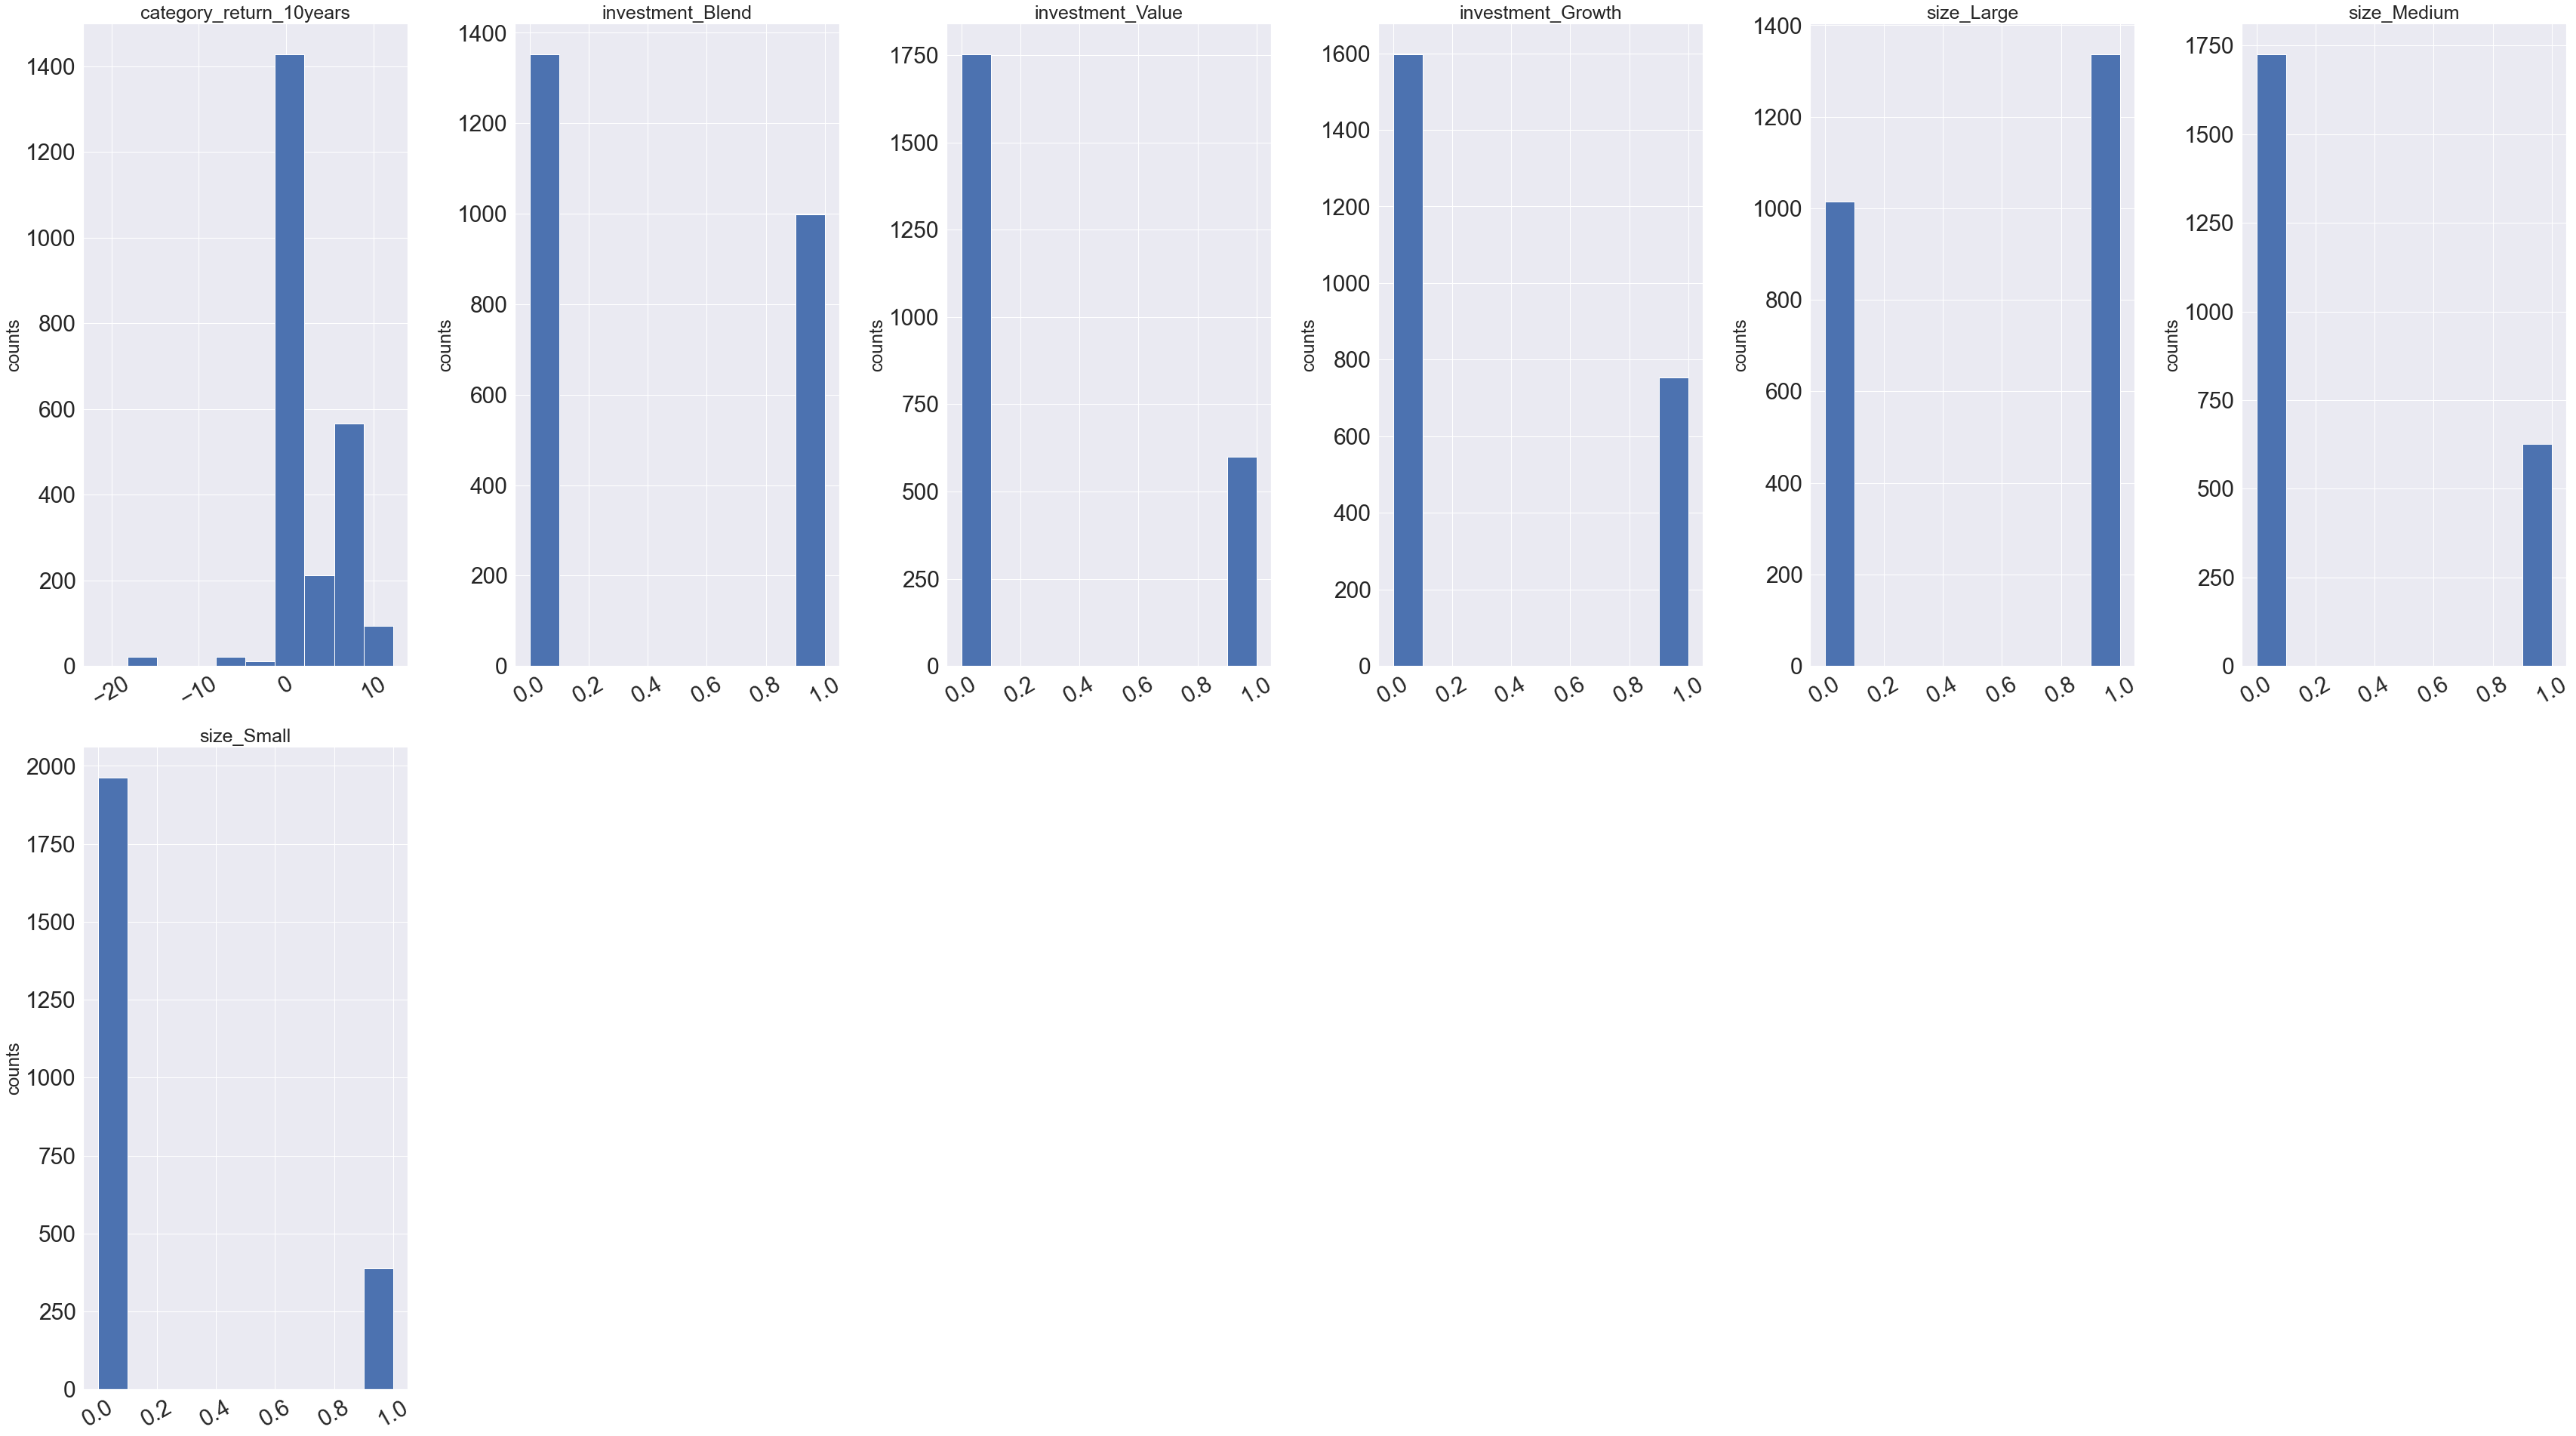

In [336]:
hist_bar_plot(etf_df)

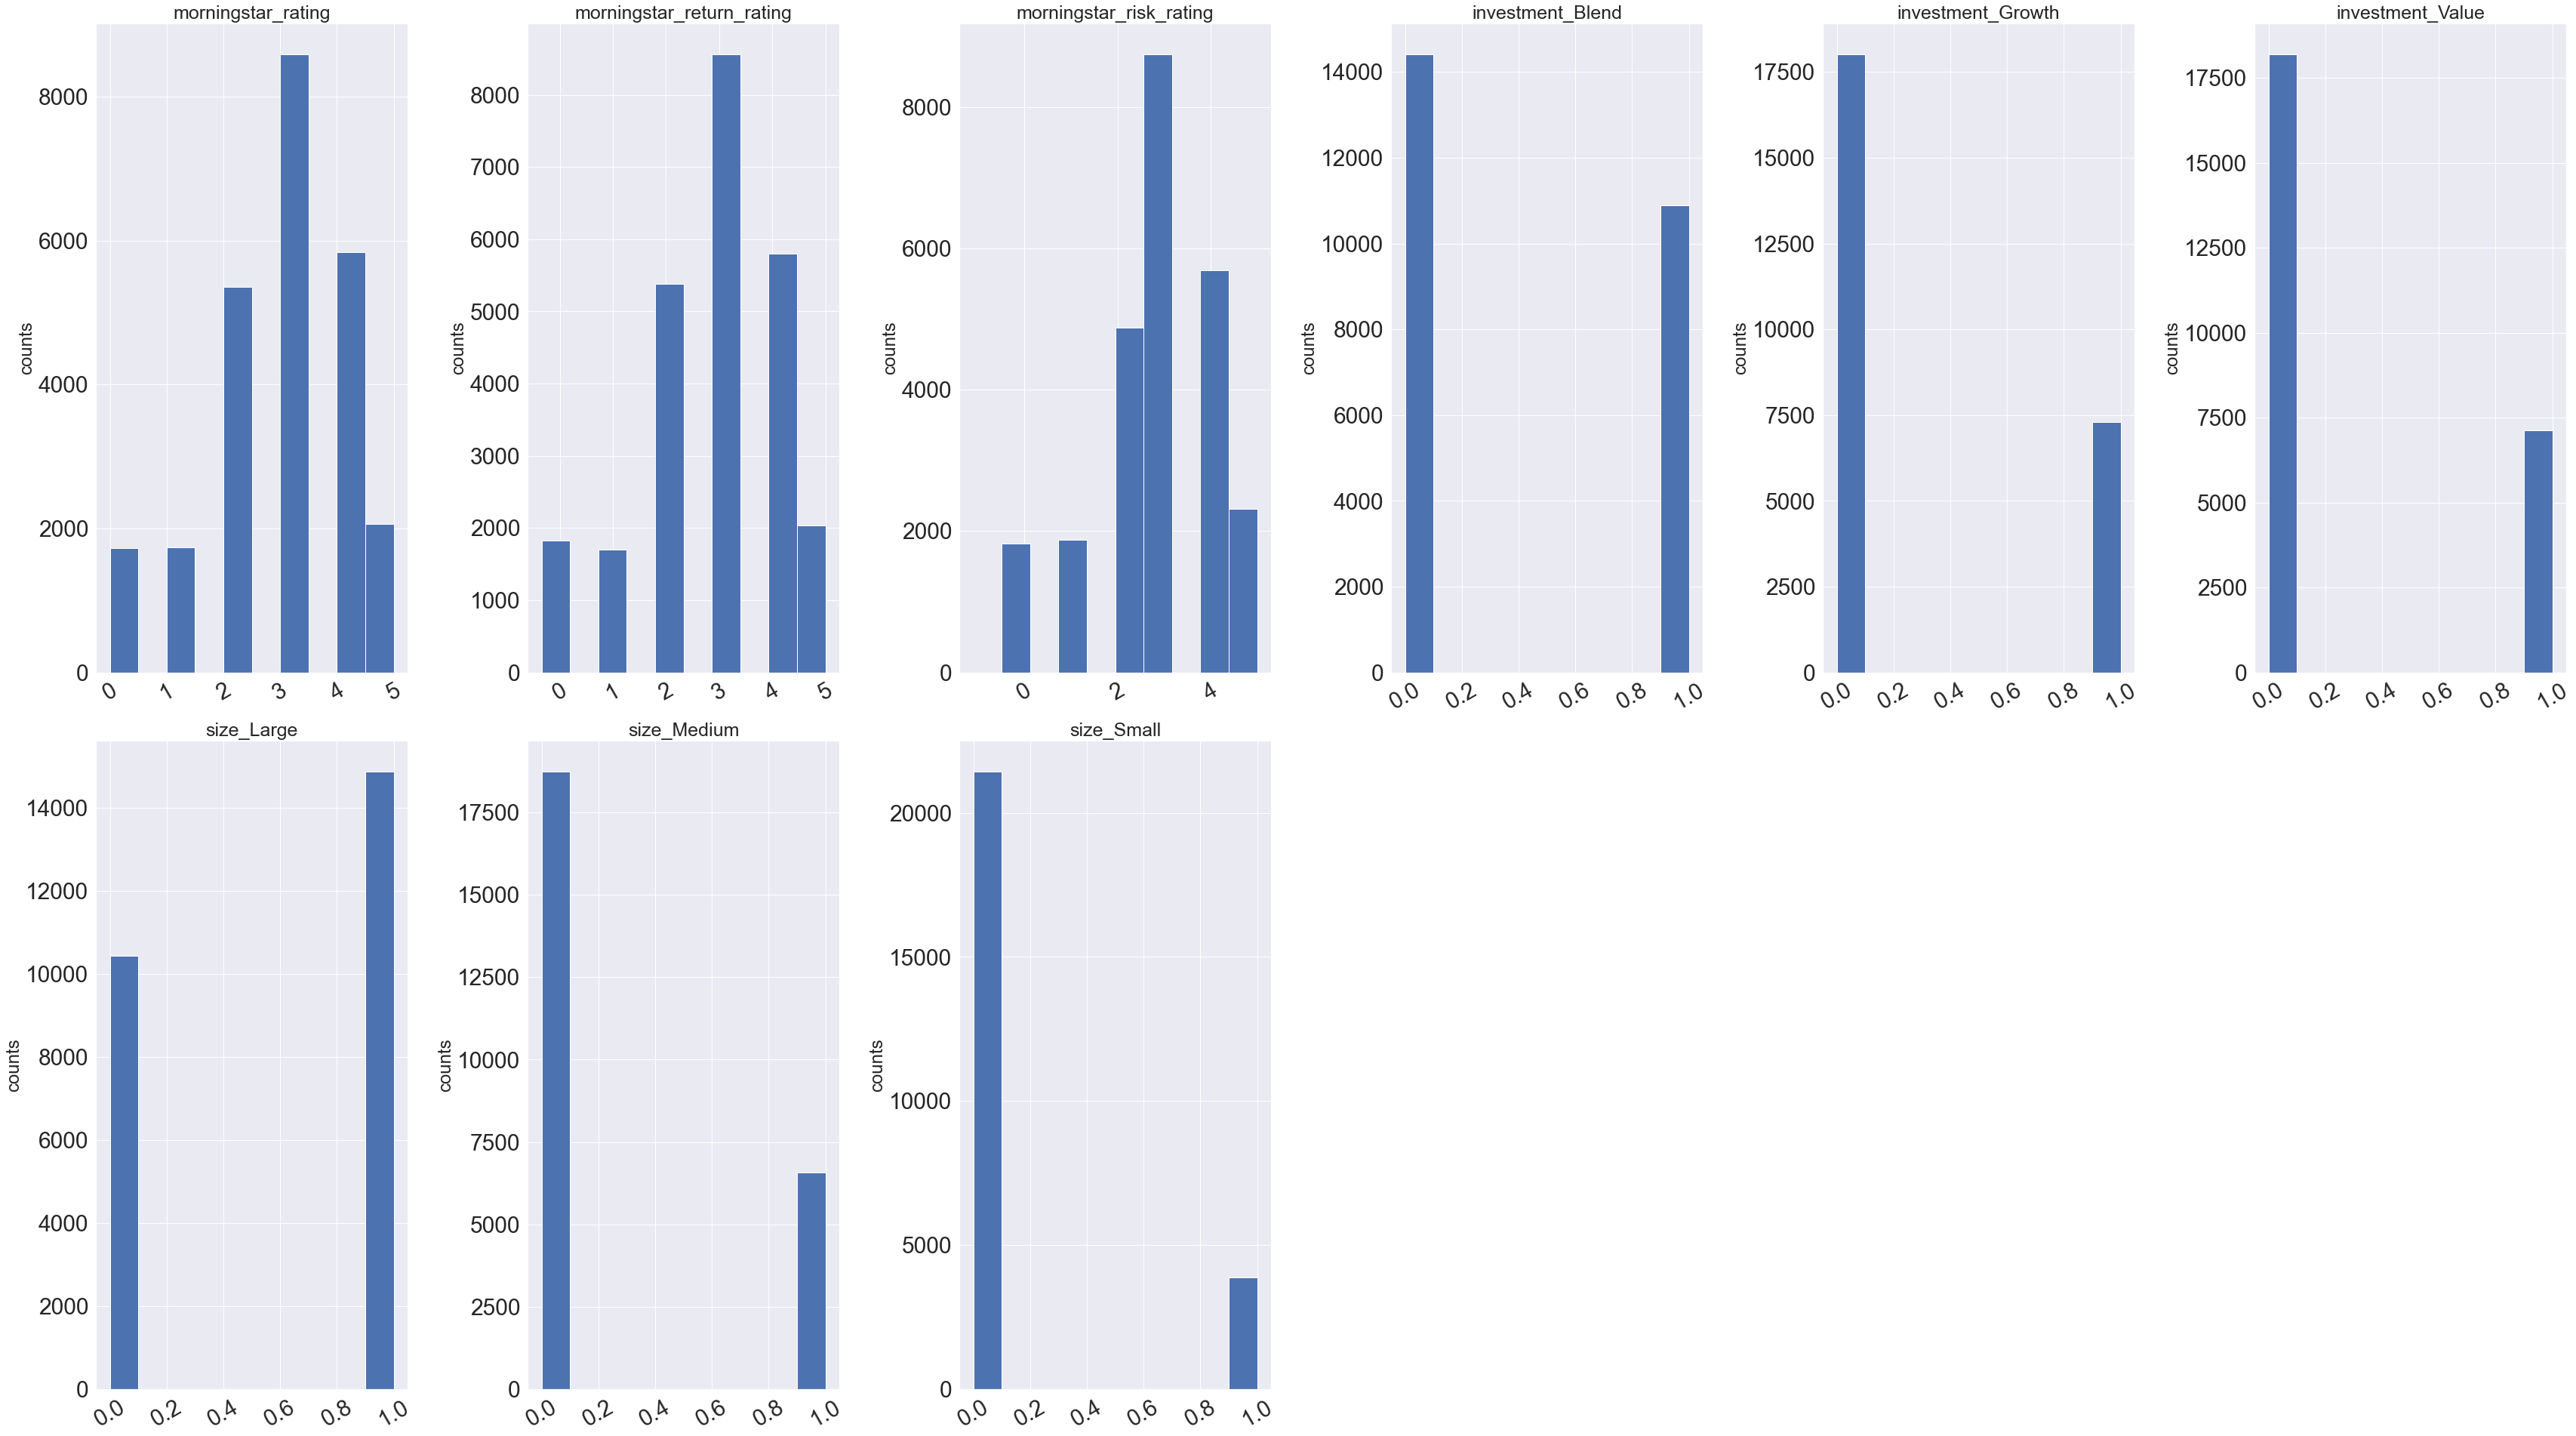

In [337]:
hist_bar_plot(mutual_df)

In [338]:
from sklearn.ensemble import RandomForestRegressor

regressors = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.LinearRegression(),
    RandomForestRegressor(n_estimators = 123, random_state = 0),
]

In [339]:
def result_metrics(actual, predicted, print_adjust=50):
    
    evs = metrics.explained_variance_score(actual, predicted)
    print("\t\tExplained variance score ".ljust(print_adjust, '.') + " {}".format(evs))

    me = metrics.max_error(actual, predicted)
    print("\t\tMax error ".ljust(print_adjust, '-') + " {}".format(me))

    mean_ae = metrics.mean_absolute_error(actual, predicted)
    print("\t\tMean absolute error ".ljust(print_adjust, '.') + " {}".format(mean_ae))
\
    mse = metrics.mean_squared_error(actual, predicted)
    print("\t\tMean squared error ".ljust(print_adjust, '-') + " {}".format(mse))

    median_ae = metrics.median_absolute_error(actual, predicted)
    print("\t\tMedian absolute error ".ljust(print_adjust, '.') + " {}".format(median_ae))

    r2 = metrics.r2_score(actual, predicted)
    print("\t\tR² score, the coefficient of determination ".ljust(print_adjust, '-') + " {}".format(r2))

    mtd = metrics.mean_tweedie_deviance(actual, predicted)
    print("\t\tMean Poisson, Gamma, and Tweedie deviances: ".ljust(50, '.') + " {}".format(mtd))


In [340]:
 x_train, x_test = train_test_split(etf_df, test_size=0.2, random_state=1)
 y_train = x_train['net_assets'].copy()
 del x_train['net_assets']

 y_test = x_test['net_assets'].copy()
 del x_test['net_assets']



In [341]:
    for model in regressors:
        start_time = time.time()
        model_name = type(model).__name__
        print("\tModel: {}".format(model_name))
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        result_metrics(y_test, y_pred)
        print("\tExecution time: %s seconds\n" % (round((time.time() - start_time), 3)))

	Model: SVR
		Explained variance score ....................... 1.905076096875291e-11
		Max error -------------------------------------- 8429858869972.123
		Mean absolute error ............................ 21609547894.831165
		Mean squared error ----------------------------- 1.5152732062222216e+23
		Median absolute error .......................... 132969921.71821937
		R² score, the coefficient of determination ----- -0.0024777970663467652
		Mean Poisson, Gamma, and Tweedie deviances: .... 1.5152732062222216e+23
	Execution time: 1.129 seconds

	Model: SGDRegressor
		Explained variance score ....................... -3126.4255307975304
		Max error -------------------------------------- 62702973343336.82
		Mean absolute error ............................ 18317501226062.125
		Mean squared error ----------------------------- 5.253436090236611e+26
		Median absolute error .......................... 15545175194946.727
		R² score, the coefficient of determination ----- -3474.5798605448913
		Mean 

C:\Users\naren\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


		Explained variance score ....................... -2.220446049250313e-16
		Max error -------------------------------------- 8409187073999.055
		Mean absolute error ............................ 39319750657.783035
		Mean squared error ----------------------------- 1.511545347564989e+23
		Median absolute error .......................... 20688426000.945484
		R² score, the coefficient of determination ----- -1.15120959982562e-05
		Mean Poisson, Gamma, and Tweedie deviances: .... 1.511545347564989e+23
	Execution time: 0.032 seconds

	Model: PassiveAggressiveRegressor


C:\Users\naren\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


		Explained variance score ....................... 0.00015775991888400398
		Max error -------------------------------------- 8429040093245.168
		Mean absolute error ............................ 21562427587.511765
		Mean squared error ----------------------------- 1.5149675305542987e+23
		Median absolute error .......................... 226485854.54881793
		R² score, the coefficient of determination ----- -0.002275567482310281
		Mean Poisson, Gamma, and Tweedie deviances: .... 1.5149675305542987e+23
	Execution time: 2.167 seconds

	Model: LinearRegression
		Explained variance score ....................... 0.027235515167101654
		Max error -------------------------------------- 8021445800411.062
		Mean absolute error ............................ 88129652050.36903
		Mean squared error ----------------------------- 1.4705545359610147e+23
		Median absolute error .......................... 48885900038.17502
		R² score, the coefficient of determination ----- 0.027107279649262073
		Mean Poisson

In [342]:
 x_train, x_test = train_test_split(mutual_df, test_size=0.2, random_state=1)
 y_train = x_train['net_assets'].copy()
 del x_train['net_assets']

 y_test = x_test['net_assets'].copy()
 del x_test['net_assets']



In [ ]:
    for model in regressors:
        start_time = time.time()
        model_name = type(model).__name__
        print("\tModel: {}".format(model_name))
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        result_metrics(y_test, y_pred)
        print("\tExecution time: %s seconds\n" % (round((time.time() - start_time), 3)))

	Model: SVR
		Explained variance score ....................... 1.8392347755913363e-08
		Max error -------------------------------------- 772285060457.6486
		Mean absolute error ............................ 3337065220.8773394
		Mean squared error ----------------------------- 3.3555499065083036e+20
		Median absolute error .......................... 409038749.92032886
		R² score, the coefficient of determination ----- -0.026950395040072683
		Mean Poisson, Gamma, and Tweedie deviances: .... 3.3555499065083036e+20
	Execution time: 150.647 seconds

	Model: SGDRegressor
		Explained variance score ....................... -10564523.07110983
		Max error -------------------------------------- 317957616081555.4
		Mean absolute error ............................ 43668287800086.4
		Mean squared error ----------------------------- 3.453484482145663e+27
		Median absolute error .......................... 29090384253274.46
		R² score, the coefficient of determination ----- -10569227.15043065
		Mean Poi

C:\Users\naren\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


		Explained variance score ....................... 4.0678571622265736e-13
		Max error -------------------------------------- 769259907569.1422
		Mean absolute error ............................ 4797254342.270378
		Mean squared error ----------------------------- 3.267523012973916e+20
		Median absolute error .......................... 3189797430.8268404
		R² score, the coefficient of determination ----- -1.0174924748529435e-05
		Mean Poisson, Gamma, and Tweedie deviances: .... 3.267523012973916e+20
	Execution time: 0.093 seconds

	Model: PassiveAggressiveRegressor
		Explained variance score ....................... 0.004891164572071061
		Max error -------------------------------------- 771795332117.5721
		Mean absolute error ............................ 3260709322.866867
		Mean squared error ----------------------------- 3.332798667068798e+20
		Median absolute error .......................... 480359482.979601
		R² score, the coefficient of determination ----- -0.01998748434554387
		Mean 